# Overgebleven ROMMEL

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import ipywidgets as widgets
from IPython.display import display

# Oefening: Data science bij Disney World
## Overzicht
In deze oefening bekijken we gegevens die wachttijdinformatie bevatten voor alle attracties in Disney World. We valideren eerst de gegeven gegevens en onderzoeken vervolgens een aantal specifieke business questions.

## Deel 1: Het opzetten van je werkruimte
Initialiseer een git-repository op je persoonlijke GitHub-account. Je moet de gegevens niet toevoegen aan deze git-repo (gebruik een .gitignore). Uiteindelijk moet je mij voorzien van een .yml-bestand waarmee ik een virtuele omgeving kan maken waarin ik al je code kan uitvoeren.

**Tip**: Je kan beginnen met werken in een basisomgeving en vervolgens aan het einde van het project een *.yml*-bestand maken. Ook de github pagina kan je op het einde aanmaken waarna je alles toevoegt.

## Deel 2: Inlezen en inspecteren
### Stap 1: De gegevens inlezen en samenvatten
Lees alle wachttijd-csv-bestanden in die zich bevinden in `data/waiting times`. Verzamel ze in één groot dataframe waarin je een extra kolom attractie toevoegt waarin je de naam van de attracties plaatst (die uit de bestandsnaam kunnen worden gehaald).

In [3]:
locs = {'waiting_folder' : '../data/waiting times'}

In [4]:
waiting_times = list()
for attraction in tqdm(os.listdir(locs['waiting_folder'])):
    filename = os.path.join(locs['waiting_folder'], attraction)
    df = pd.read_csv(filename)
    if df.empty:
        continue
    df.insert(0, 'attraction', attraction.split('.')[0])
    waiting_times.append(df)

df_wait_raw = pd.concat(waiting_times, ignore_index=True)

100%|██████████| 52/52 [00:06<00:00,  8.05it/s]


In [5]:
df_wait = df_wait_raw.copy()
# Cleaning the actual waiting times
# Removing outliers from actuals
df_wait = df_wait[((df_wait.SACTMIN >= -1000) & (df_wait.SACTMIN < 360)) | (df_wait.SACTMIN.isnull())]
# Removing outliers from posted (attraction closed at -999)
df_wait = df_wait[(df_wait.SPOSTMIN >= -998.99) | (df_wait.SPOSTMIN.isnull())]

df_wait['date'] = pd.to_datetime(df_wait.date, format = '%m/%d/%Y')
df_wait['datetime'] = pd.to_datetime(df_wait.datetime, format = '%Y-%m-%d %H:%M:%S')

print(f"Removed {len(df_wait_raw) - len(df_wait)} rows")

# You could split the dataset into two seperate dataframes (plusjes & minnetjes :-))
df_wait_act = df_wait[~df_wait.SACTMIN.isnull()].drop('SPOSTMIN', axis = 1)
df_wait_post = df_wait[~df_wait.SPOSTMIN.isnull()].drop('SACTMIN', axis = 1)

attractions = df_wait.attraction.unique()

Removed 1295640 rows


In [6]:
df_wait

,attraction,date,datetime,SACTMIN,SPOSTMIN,date,datetime,SACTMIN,SPOSTMIN
0,7_dwarfs_train,01/01/2015,2015-01-01 07:51:12,,45,NaT,NaT,NaN,NaN
1,7_dwarfs_train,01/01/2015,2015-01-01 08:02:13,,60,NaT,NaT,NaN,NaN
2,7_dwarfs_train,01/01/2015,2015-01-01 08:05:30,54,,NaT,NaT,NaN,NaN
3,7_dwarfs_train,01/01/2015,2015-01-01 08:09:12,,60,NaT,NaT,NaN,NaN
4,7_dwarfs_train,01/01/2015,2015-01-01 08:16:12,,60,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10306135,winnie_the_pooh,NaN,NaN,NaN,NaN,2021-12-28,2021-12-28 22:34:35,NaN,5.0
10306136,winnie_the_pooh,NaN,NaN,NaN,NaN,2021-12-28,2021-12-28 22:42:15,NaN,5.0
10306137,winnie_the_pooh,NaN,NaN,NaN,NaN,2021-12-28,2021-12-28 22:48:12,NaN,5.0
10306138,winnie_the_pooh,NaN,NaN,NaN,NaN,2021-12-28,2021-12-28 22:54:10,NaN,5.0


In [7]:
df_wait_post.groupby('attraction')['SPOSTMIN'].describe().head()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
alien_saucers,121772.0,29.863351,15.998896,0.0,20.0,30.0,40.0,190.0
astro_orbiter,274923.0,27.026822,13.458805,0.0,20.0,25.0,35.0,180.0
barnstormer,286649.0,19.227069,14.330115,0.0,5.0,15.0,25.0,120.0
big_thunder_mtn,274544.0,37.630817,23.339693,0.0,20.0,35.0,50.0,300.0
buzz_lightyear,296459.0,31.639333,19.493587,0.0,15.0,30.0,45.0,160.0


In [8]:
df_wait_post.groupby('attraction')['SPOSTMIN'].describe().head()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
alien_saucers,121772.0,29.863351,15.998896,0.0,20.0,30.0,40.0,190.0
astro_orbiter,274923.0,27.026822,13.458805,0.0,20.0,25.0,35.0,180.0
barnstormer,286649.0,19.227069,14.330115,0.0,5.0,15.0,25.0,120.0
big_thunder_mtn,274544.0,37.630817,23.339693,0.0,20.0,35.0,50.0,300.0
buzz_lightyear,296459.0,31.639333,19.493587,0.0,15.0,30.0,45.0,160.0


### Stap 2: Valideer de gegevens met behulp van enkele visuele voorstellingen
Maak een functie die het dataframe dat je zojuist hebt gemaakt, een datum en een lijst met attracties als invoer neemt. De functie moet vervolgens een plot maken waarin je de wachttijd over de gegeven datum hebt voor alle geselecteerde attracties. Je kunt deze functie gebruiken om een gevoel te krijgen voor hoe goed de werkelijke en geposte wachttijden zijn gevuld.

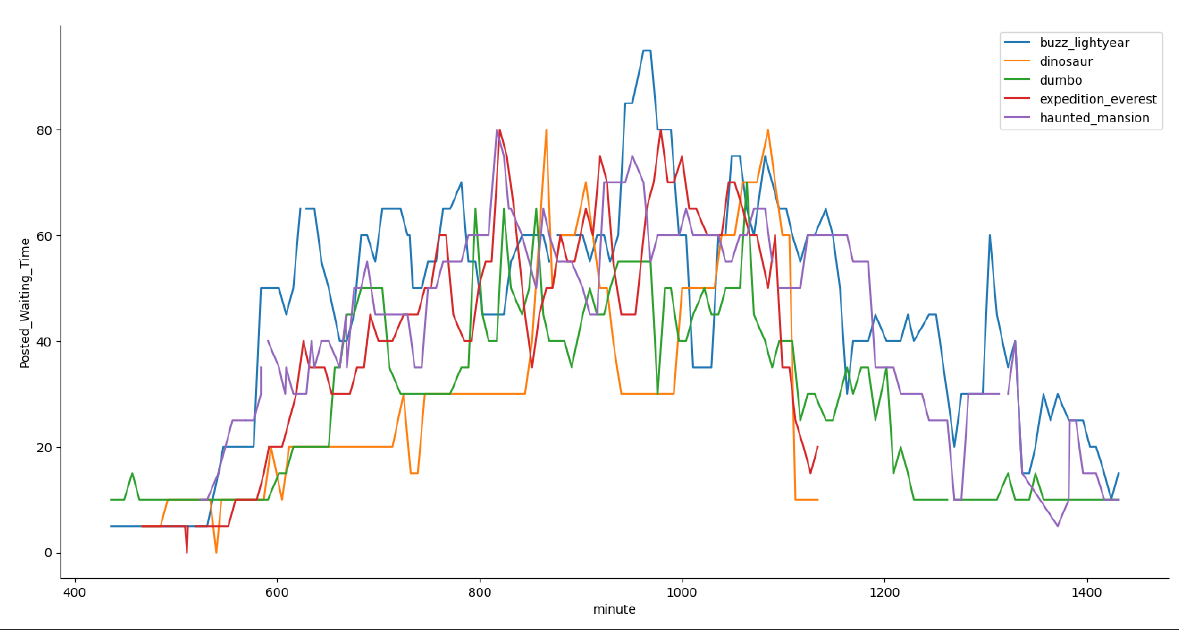

In [9]:
# Create a dropdown widget for selecting attractions
attraction_dropdown = widgets.Dropdown(
    options=attractions,
    description='Attraction:',
    value=attractions[0]  # Default value
)

# Function to update the plot based on selected attraction
def update_plot(attraction):
    plt.figure(figsize=(12, 4))  # Create a new figure
    plt.subplot(1, 2, 1)  # First subplot
    df_wait_attraction = df_wait.query("attraction == @attraction")
    df_wait_attraction.SACTMIN.plot.hist(bins=30, title='Actual waiting times')
    
    plt.subplot(1, 2, 2)  # Second subplot
    df_wait_attraction.SPOSTMIN.plot.hist(bins=np.arange(-2.5, df_wait.SPOSTMIN.max() + 2.5, 10), title='Posted waiting times')
    
    plt.tight_layout()

# Link the dropdown to the update function
interactive_plot = widgets.interactive(update_plot, attraction=attraction_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Attraction:', options=('7_dwarfs_train', 'alien_saucers', 'astro_o…

x- as in minuten, dagen eindigen niet om 24u, park open tot na 24 soms
datetime min
uur*60, eindstuk aan begin plakken

dag laten lopen op momenten dat het park zeker open is

- x-as in int is makkelijker om mee te werken

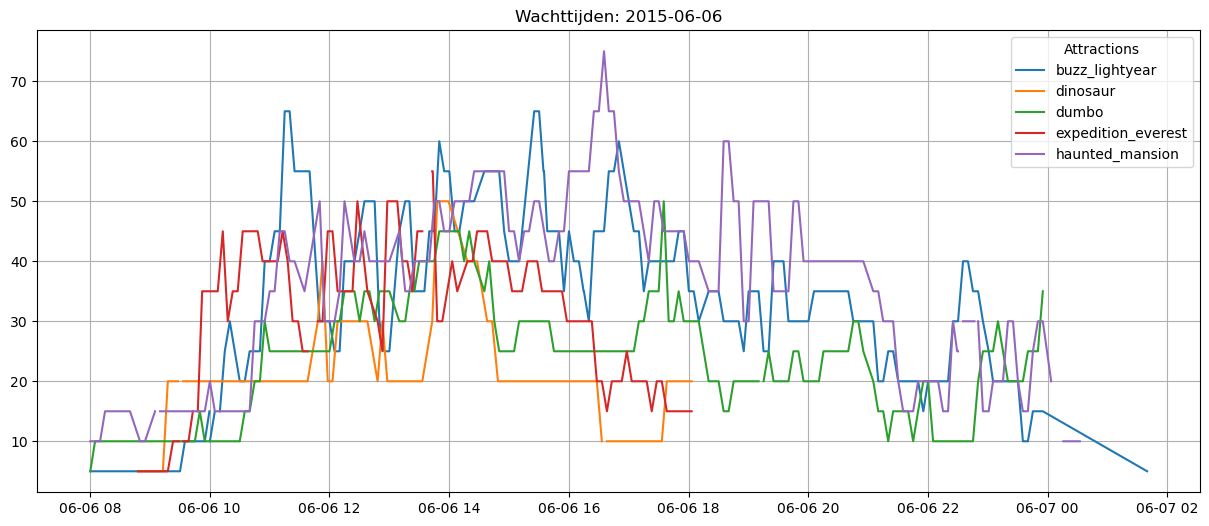

In [10]:
chosen_date = "2015-06-06" 
chosen_attractions = ["buzz_lightyear", "dinosaur", "dumbo", "expedition_everest", "haunted_mansion"]

df_chosen = df_wait[(df_wait["date"] == chosen_date) & (df_wait["attraction"].isin(chosen_attractions))]

plt.figure(figsize=(15, 6))

for i, attraction in enumerate(chosen_attractions):
        df_attractie = df_chosen[df_chosen["attraction"] == attraction]
        plt.plot(df_attractie["datetime"], df_attractie["SPOSTMIN"], label=f"{attraction}")

plt.title(f"Wachttijden: {chosen_date}")
plt.legend(title="Attractions")
plt.grid()

plt.show()

### Stap 3: Onderzoek voor welke attracties we voldoende informatie hebben over de geposte wachttijd.
Kijk naar hoeveel gegevenspunten van geposte wachttijd je per dag hebt voor elke attractie. Op deze manier kun je attracties uitsluiten met te weinig gegevenspunten gemiddeld.

maken voor dagen waar er datapunten zijn, lege dagen weghalen, in notebook van filmpje is er wel rekening meegehouden
dag indeling is nogsteeds anders (verschil met vb)

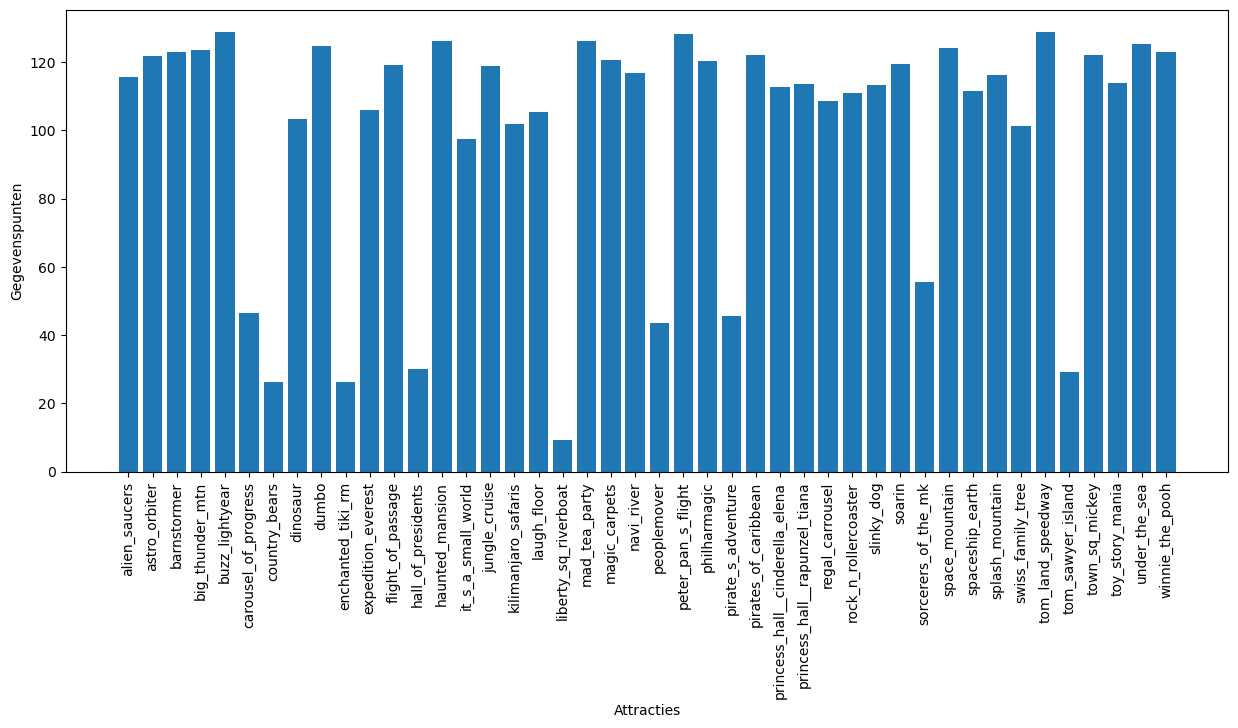

In [11]:
posted_count = df_wait.groupby(["attraction", "date"])["SPOSTMIN"].count().reset_index()

avg_posted_count = posted_count.groupby("attraction")["SPOSTMIN"].mean().reset_index()

plt.figure(figsize=(15, 6))
plt.bar(avg_posted_count["attraction"], avg_posted_count["SPOSTMIN"])

plt.xlabel("Attracties")
plt.ylabel("Gegevenspunten")
plt.xticks(rotation=90)

plt.show()


### Stap 4: Bestudeer de spreiding van de beschikbaarheid van gegevens voor actuele wachttijdinformatie.

Er lijkt niet zo veel informatie beschikbaar te zijn over de werkelijke wachttijden bij attracties. Is dit omdat we elke dag gewoon beperkte gegevens hebben, of zijn er enkele dagen met veel informatie? Maak een aantal
visualisaties maken om dit te onderzoeken?

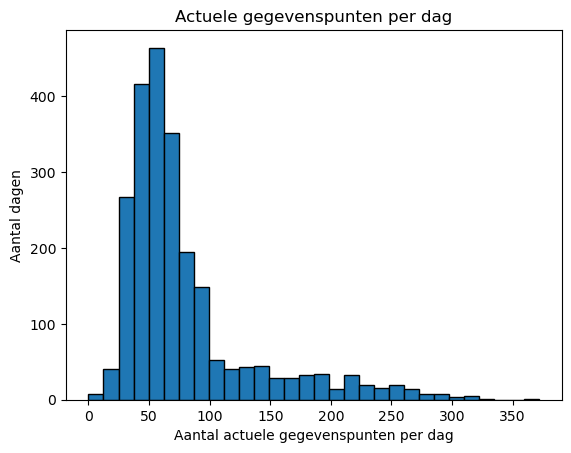

In [12]:
actual_counts_per_day = df_wait.groupby("date")["SACTMIN"].count().reset_index()

plt.hist(actual_counts_per_day["SACTMIN"], bins=30, edgecolor="black")
plt.xlabel("Aantal actuele gegevenspunten per dag")
plt.ylabel("Aantal dagen")
plt.title("Actuele gegevenspunten per dag")
plt.show()



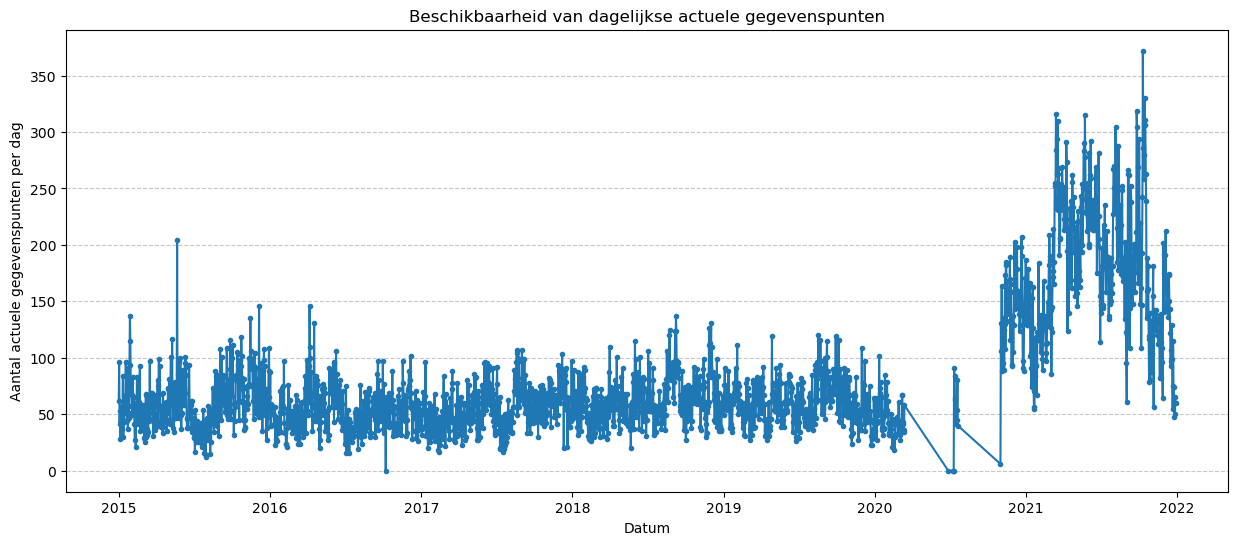

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(actual_counts_per_day["date"], actual_counts_per_day["SACTMIN"], marker=".", linestyle="-")
plt.xlabel("Datum")
plt.ylabel("Aantal actuele gegevenspunten per dag")
plt.title("Beschikbaarheid van dagelijkse actuele gegevenspunten")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Onderzoeksvraag 1: Vergelijk voorspelde en werkelijke wachttijd
Maak een visualisatie die laat zien hoe de voorspelde en werkelijke wachttijden zich tot elkaar verhouden.

Hiervoor kan je volgende stappen uitvoeren:
 - Zoek voor elke werkelijke wachttijd de vorige en volgende voorspelde wachttijd.
 - Gebruik lineaire interpolatie om de beste schatting van de gepubliceerde wachttijd te vinden voor de werkelijke wachttijd die we onderzoeken.
 - Bereken het verschil tussen de werkelijke en de geposte wachttijd.
 - Maak een histogram van al deze verschillen, een scatterplot is hier ook een geschikte visualizatie.

Je kan ook eens kijken naar enkele specifieke datum & attractie combinaties waarvoor je veel werkelijke wachttijdinformatie hebt en dan de werkelijke en geposte wachttijd uittekenen en vergelijken.

## Onderzoeksvraag 2: beste dag voor attracties
Filter de attracties met `category_code == ride` uit en zoek uit welke dag van de week
(maandag/dinsdag/...) deze attracties gemiddeld de kortste wachttijden hebben. 

Probeer in een tweede stap verder specifiek te kijken naar de combinatie van dag van de week en `HOLIDAYM`-waarde. Idealiter zou je ook uitleggen wat dit betekent.

#### TODO

- posted waiting timles interpoleren op tijden wanner je actual waiting times hebt is makeklijke r met integers idpv datetime objecten

In [14]:
import pandas as pd

In [15]:
entities_extra = pd.read_csv('../data/overview data/entities_extra.csv')
entities_extra.head()

,name,fastpass_booth,created_at,updated_at,short_name,open_emh_morning,open_emh_evening,single_rider,time_zone,seasonal,...,masthead_circle_y,latitude,longitude,open_early,themeparks_id,has_virtual_queue,relative_open_base,virtual_queue_only,fastpass_average_minutes_saved,fastpass_average_gone_at
0,Astro Orbiter,False,2009-07-13T19:14:03.000-04:00,2021-11-15T12:59:25.000-05:00,Astro Orbiter,True,True,False,Eastern Time (US & Canada),False,...,31,28.418493,-81.578989,False,d9d12438-d999-4482-894b-8955fdb20ccf,False,0,False,0,0
1,The Barnstormer,False,2009-07-13T19:14:05.000-04:00,2023-01-15T22:03:41.000-05:00,Barnstormer,True,True,False,Eastern Time (US & Canada),False,...,157,28.420766,-81.578391,False,924a3b2c-6b4b-49e5-99d3-e9dc3f2e8a48,False,0,False,3,2000-01-01T21:00:00.000Z
2,Bibbidi Bobbidi Boutique,False,2019-11-27T06:45:19.000-05:00,2020-08-18T12:14:30.000-04:00,Bibbidi Bobbidi Boutique,False,False,False,Eastern Time (US & Canada),False,...,0,28.419479,-81.581235,False,0,False,0,False,0,0
3,Big Thunder Mountain Railroad,False,2009-07-13T16:14:03.000-07:00,2023-03-21T10:41:21.000-07:00,Big Thunder Mtn,False,True,False,Eastern Time (US & Canada),False,...,194,28.419964,-81.584642,False,de3309ca-97d5-4211-bffe-739fed47e92f,False,0,False,19,2000-01-01T18:00:00.000Z
4,Buzz Lightyear's Space Ranger Spin,False,2009-07-13T16:14:03.000-07:00,2023-03-21T09:15:14.000-07:00,Buzz Lightyear,True,True,False,Eastern Time (US & Canada),False,...,80,28.418287,-81.579409,False,72c7343a-f7fb-4f66-95df-c91016de7338,False,0,False,23,2000-01-01T21:00:00.000Z


In [16]:
entities = pd.read_csv('../data/overview data/entities.csv')
entities.head()

,code,name,short_name,land,opened_on,duration,average_wait_per_hundred
0,AK01,It's Tough to Be a Bug!,It's Tough to Be a Bug,Discovery Island,04/22/1998,8.0,12.0
1,AK07,Kilimanjaro Safaris,Kilimanjaro Safaris,Africa,04/22/1998,20.0,4.0
2,AK11,Expedition Everest - Legend of the Forbidden M...,Expedition Everest,Asia,04/07/2006,4.0,4.0
3,AK14,Kali River Rapids,Kali River Rapids,Asia,02/15/1999,10.0,5.0
4,AK18,DINOSAUR,DINOSAUR,DinoLand U.S.A.,04/22/1998,3.5,3.0


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 7: Wim, stomme attractie barometer
</div>

Zijn er attracties niet meer voldoende attractief

In [17]:
mean_spostmin_per_attraction = df_wait.groupby('attraction')['SPOSTMIN'].mean()

df_mean_spostmin_per_attraction = pd.DataFrame(mean_spostmin_per_attraction).sort_values(by='SPOSTMIN', ascending=False)

display(df_mean_spostmin_per_attraction.head())
display(df_mean_spostmin_per_attraction.tail())


,SPOSTMIN
attraction,
flight_of_passage,114.806860
slinky_dog,72.703003
navi_river,62.511237
rock_n_rollercoaster,58.994605
space_mountain,56.456800


,SPOSTMIN
attraction,
enchanted_tiki_rm,4.906537
pirate_s_adventure,1.338798
swiss_family_tree,0.933885
sorcerers_of_the_mk,0.000000
7_dwarfs_train,NaN


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 8: Wim 2, leuke attractie barometer
</div>

Zijn er attracties te attractief & moeten we er zo nieuwe maken van dezelfde soort? Gerelateerd: welk type attracties moeten we evt bijmaken?

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    spelen met entities extras
</div>

In [18]:
df_entities_extra_all = pd.read_csv(('../data/overview data/entities_extra.csv'))

df_entities_extra_all_name = df_entities_extra_all[['name']] 
display(df_entities_extra_all_name)

,name
0,Astro Orbiter
1,The Barnstormer
2,Bibbidi Bobbidi Boutique
3,Big Thunder Mountain Railroad
4,Buzz Lightyear's Space Ranger Spin
5,Casey Jr. Splash 'N' Soak Station
6,Casey's Corner Pianist
7,Country Bear Jamboree
8,Dapper Dans
9,Disney Enchantment


In [19]:
df_entities_extra_rides = df_entities_extra_all[df_entities_extra_all['category_code'] == 'ride']

display(df_entities_extra_rides)

,name,fastpass_booth,created_at,updated_at,short_name,open_emh_morning,open_emh_evening,single_rider,time_zone,seasonal,...,masthead_circle_y,latitude,longitude,open_early,themeparks_id,has_virtual_queue,relative_open_base,virtual_queue_only,fastpass_average_minutes_saved,fastpass_average_gone_at
0,Astro Orbiter,False,2009-07-13T19:14:03.000-04:00,2021-11-15T12:59:25.000-05:00,Astro Orbiter,True,True,False,Eastern Time (US & Canada),False,...,31,28.418493,-81.578989,False,d9d12438-d999-4482-894b-8955fdb20ccf,False,0,False,0,0
1,The Barnstormer,False,2009-07-13T19:14:05.000-04:00,2023-01-15T22:03:41.000-05:00,Barnstormer,True,True,False,Eastern Time (US & Canada),False,...,157,28.420766,-81.578391,False,924a3b2c-6b4b-49e5-99d3-e9dc3f2e8a48,False,0,False,3,2000-01-01T21:00:00.000Z
3,Big Thunder Mountain Railroad,False,2009-07-13T16:14:03.000-07:00,2023-03-21T10:41:21.000-07:00,Big Thunder Mtn,False,True,False,Eastern Time (US & Canada),False,...,194,28.419964,-81.584642,False,de3309ca-97d5-4211-bffe-739fed47e92f,False,0,False,19,2000-01-01T18:00:00.000Z
4,Buzz Lightyear's Space Ranger Spin,False,2009-07-13T16:14:03.000-07:00,2023-03-21T09:15:14.000-07:00,Buzz Lightyear,True,True,False,Eastern Time (US & Canada),False,...,80,28.418287,-81.579409,False,72c7343a-f7fb-4f66-95df-c91016de7338,False,0,False,23,2000-01-01T21:00:00.000Z
11,Dumbo the Flying Elephant,False,2009-07-13T19:14:03.000-04:00,2023-01-15T22:03:39.000-05:00,Dumbo,True,True,False,Eastern Time (US & Canada),False,...,95,28.420509,-81.578947,False,890fa430-89c0-4a3f-96c9-11597888005e,False,0,False,5,2000-01-01T20:00:00.000Z
18,The Haunted Mansion,False,2009-07-13T19:14:05.000-04:00,2023-03-21T14:49:31.000-04:00,Haunted Mansion,False,True,False,Eastern Time (US & Canada),False,...,55,28.420200,-81.582880,False,2551a77d-023f-4ab1-9a19-8afec0190f39,False,0,False,19,2000-01-01T18:00:00.000Z
19,"""it's a small world""",False,2009-07-13T19:14:03.000-04:00,2023-03-21T14:22:14.000-04:00,it's a small world,True,True,False,Eastern Time (US & Canada),False,...,106,28.420482,-81.582039,False,f5aad2d4-a419-4384-bd9a-42f86385c750,False,0,False,9,2000-01-01T20:00:00.000Z
20,Jungle Cruise,False,2009-07-13T16:14:03.000-07:00,2023-03-21T12:36:05.000-07:00,Jungle Cruise,False,False,False,Eastern Time (US & Canada),False,...,207,28.417978,-81.583439,False,796b0a25-c51e-456e-9bb8-50a324e301b3,False,0,False,30,2000-01-01T14:00:00.000Z
22,Liberty Square Riverboat,False,2009-07-13T19:14:03.000-04:00,2021-11-15T12:27:18.000-05:00,Liberty Sq Riverboat,False,False,False,Eastern Time (US & Canada),False,...,125,28.419556,-81.582798,False,15700490-3749-45cf-a737-3cba56e13704,False,0,False,0,0
23,Mad Tea Party,False,2009-07-13T19:14:04.000-04:00,2023-01-15T22:03:40.000-05:00,Mad Tea Party,True,True,False,Eastern Time (US & Canada),False,...,69,28.420023,-81.579825,False,0aae716c-af13-4439-b638-d75fb1649df3,False,0,False,11,2000-01-01T21:00:00.000Z


In [20]:
col_names = list(df_entities_extra_all)

for col in col_names:
      unique_values = set(df_entities_extra_all[col].dropna().explode())
      print(f"'{col}': {unique_values}")

'name': {'Mad Tea Party', 'Tomorrowland Speedway', "Buzz Lightyear's Space Ranger Spin", "Casey's Corner Pianist", "Casey Jr. Splash 'N' Soak Station", 'Pirates of the Caribbean', 'Meet Tinker Bell at Town Square Theater', 'Monsters, Inc. Laugh Floor', 'The Magic Carpets of Aladdin', 'The Haunted Mansion', "Peter Pan's Flight", "Walt Disney's Enchanted Tiki Room", 'Walt Disney World Railroad - Frontierland', 'Meet Princess Tiana and a Visiting Princess at Princess Fairytale Hall', 'Meet Dashing Disney Pals as Circus Stars at Pete’s Silly Side Show', 'The Barnstormer', 'Country Bear Jamboree', 'Liberty Square Riverboat', 'Prince Charming Regal Carrousel', 'Seven Dwarfs Mine Train', 'Jungle Cruise', 'Main Street Trolley Show', 'Tom Sawyer Island', "A Pirate's Adventure ~ Treasures of the Seven Seas", 'Big Thunder Mountain Railroad', 'Let the Magic Begin', 'Flag Retreat', "Walt Disney's Carousel of Progress", 'Dumbo the Flying Elephant', 'OLD Meet Cinderella and a Visiting Princess at Pri

In [21]:
alle_attracties = df_wait['attraction'].unique()

df_all_attractions = pd.DataFrame(alle_attracties, columns=['attraction'])
display(df_all_attractions)

df_entities_extra_non_rides = df_entities_extra_all[df_entities_extra_all['category_code'] != 'ride']


display(df_entities_extra_non_rides)
# display(df_entities_extra_all['name'])
# display(df_entities_extra_all)

,attraction
0,7_dwarfs_train
1,alien_saucers
2,astro_orbiter
3,barnstormer
4,big_thunder_mtn
5,buzz_lightyear
6,carousel_of_progress
7,country_bears
8,dinosaur
9,dumbo


,name,fastpass_booth,created_at,updated_at,short_name,open_emh_morning,open_emh_evening,single_rider,time_zone,seasonal,...,masthead_circle_y,latitude,longitude,open_early,themeparks_id,has_virtual_queue,relative_open_base,virtual_queue_only,fastpass_average_minutes_saved,fastpass_average_gone_at
2,Bibbidi Bobbidi Boutique,False,2019-11-27T06:45:19.000-05:00,2020-08-18T12:14:30.000-04:00,Bibbidi Bobbidi Boutique,False,False,False,Eastern Time (US & Canada),False,...,0,28.419479,-81.581235,False,0,False,0,False,0,0
5,Casey Jr. Splash 'N' Soak Station,False,2012-01-30T21:29:31.000-05:00,2021-07-24T22:57:32.000-04:00,Casey Jr Splash,False,False,False,Eastern Time (US & Canada),False,...,0,28.420958,-81.578701,False,f010bc01-b450-4476-a5f3-a5f2813104b2,False,0,False,0,0
6,Casey's Corner Pianist,False,2010-07-07T18:48:23.000-04:00,2021-11-04T00:05:06.000-04:00,Casey's Corner Pianist,False,False,False,Eastern Time (US & Canada),False,...,344,28.418025,-81.581366,False,a0613b70-293f-4a5b-8169-357be1777c62,False,0,False,0,0
7,Country Bear Jamboree,False,2009-07-13T19:14:03.000-04:00,2021-11-15T12:10:24.000-05:00,Country Bears,False,True,False,Eastern Time (US & Canada),False,...,130,28.418786,-81.583722,False,0f57cecf-5502-4503-8bc3-ba84d3708ace,False,0,False,0,0
8,Dapper Dans,False,2010-07-07T18:47:38.000-04:00,2021-11-04T00:05:04.000-04:00,Dapper Dans,False,False,False,Eastern Time (US & Canada),False,...,0,28.417410,-81.581217,False,1eee22e8-1d0a-4809-a42b-df3ae55c69d5,False,0,False,0,0
9,Disney Enchantment,False,2021-06-24T13:01:01.000-04:00,2023-01-10T09:28:45.000-05:00,Disney Enchantment,False,False,False,Eastern Time (US & Canada),False,...,0,28.419147,-81.581205,False,bb74811e-b80e-4d24-bca1-d880f0af4732,False,0,False,0,0
10,Disney Festival of Fantasy Parade,False,2014-01-22T21:41:21.000-05:00,2023-01-15T22:03:39.000-05:00,Festival Parade,False,False,False,Eastern Time (US & Canada),False,...,58,28.417527,-81.581208,False,ee56b2f3-fd49-4a29-ae1a-2d321549a633,False,0,False,0,2000-01-01T14:00:00.000Z
12,Enchanted Tales with Belle,False,2012-06-04T19:04:07.000-07:00,2021-09-08T12:38:08.000-07:00,Ench Tales w/ Belle,False,False,False,Eastern Time (US & Canada),False,...,82,28.420991,-81.580930,False,e76c93df-31af-49a5-8e2f-752c76c937c9,False,0,False,0,0
13,Flag Retreat,False,2010-07-04T20:09:57.000-07:00,2021-11-03T21:05:04.000-07:00,Flag Retreat,False,False,False,Eastern Time (US & Canada),False,...,150,28.416858,-81.581199,False,1c708beb-41e1-43ae-8dd8-1e85075aeb38,False,0,False,0,0
14,Frontierland Hoedown,False,2010-07-07T19:01:31.000-04:00,2022-02-08T23:39:10.000-05:00,Hoedown,False,False,False,Eastern Time (US & Canada),False,...,0,28.418889,-81.583628,False,0,False,0,False,0,0


___________________________________________________________________________________________________________________________

Nieuwe Extra Entitities

In [22]:
attractions_with_waitingtimes = df_wait['attraction'].unique()

df_att_with_waittime = pd.DataFrame(attractions_with_waitingtimes, columns=['attraction'])
display(df_att_with_waittime.head(10))

,attraction
0,7_dwarfs_train
1,alien_saucers
2,astro_orbiter
3,barnstormer
4,big_thunder_mtn
5,buzz_lightyear
6,carousel_of_progress
7,country_bears
8,dinosaur
9,dumbo


In [23]:
df_entities_extra_all = pd.read_csv(('../data/overview data/entities_extra.csv'))

display(df_entities_extra_all.head())

,name,fastpass_booth,created_at,updated_at,short_name,open_emh_morning,open_emh_evening,single_rider,time_zone,seasonal,...,masthead_circle_y,latitude,longitude,open_early,themeparks_id,has_virtual_queue,relative_open_base,virtual_queue_only,fastpass_average_minutes_saved,fastpass_average_gone_at
0,Astro Orbiter,False,2009-07-13T19:14:03.000-04:00,2021-11-15T12:59:25.000-05:00,Astro Orbiter,True,True,False,Eastern Time (US & Canada),False,...,31,28.418493,-81.578989,False,d9d12438-d999-4482-894b-8955fdb20ccf,False,0,False,0,0
1,The Barnstormer,False,2009-07-13T19:14:05.000-04:00,2023-01-15T22:03:41.000-05:00,Barnstormer,True,True,False,Eastern Time (US & Canada),False,...,157,28.420766,-81.578391,False,924a3b2c-6b4b-49e5-99d3-e9dc3f2e8a48,False,0,False,3,2000-01-01T21:00:00.000Z
2,Bibbidi Bobbidi Boutique,False,2019-11-27T06:45:19.000-05:00,2020-08-18T12:14:30.000-04:00,Bibbidi Bobbidi Boutique,False,False,False,Eastern Time (US & Canada),False,...,0,28.419479,-81.581235,False,0,False,0,False,0,0
3,Big Thunder Mountain Railroad,False,2009-07-13T16:14:03.000-07:00,2023-03-21T10:41:21.000-07:00,Big Thunder Mtn,False,True,False,Eastern Time (US & Canada),False,...,194,28.419964,-81.584642,False,de3309ca-97d5-4211-bffe-739fed47e92f,False,0,False,19,2000-01-01T18:00:00.000Z
4,Buzz Lightyear's Space Ranger Spin,False,2009-07-13T16:14:03.000-07:00,2023-03-21T09:15:14.000-07:00,Buzz Lightyear,True,True,False,Eastern Time (US & Canada),False,...,80,28.418287,-81.579409,False,72c7343a-f7fb-4f66-95df-c91016de7338,False,0,False,23,2000-01-01T21:00:00.000Z


In [24]:
# merge_name komt overeen met de naam uit de waiting_time data

df_entities_extra_all['merge_name'] = df_entities_extra_all['short_name'].copy().str.lower().str.replace(r"[\s':/]", "_", regex=True)
display(df_entities_extra_all.head())

,name,fastpass_booth,created_at,updated_at,short_name,open_emh_morning,open_emh_evening,single_rider,time_zone,seasonal,...,latitude,longitude,open_early,themeparks_id,has_virtual_queue,relative_open_base,virtual_queue_only,fastpass_average_minutes_saved,fastpass_average_gone_at,merge_name
0,Astro Orbiter,False,2009-07-13T19:14:03.000-04:00,2021-11-15T12:59:25.000-05:00,Astro Orbiter,True,True,False,Eastern Time (US & Canada),False,...,28.418493,-81.578989,False,d9d12438-d999-4482-894b-8955fdb20ccf,False,0,False,0,0,astro_orbiter
1,The Barnstormer,False,2009-07-13T19:14:05.000-04:00,2023-01-15T22:03:41.000-05:00,Barnstormer,True,True,False,Eastern Time (US & Canada),False,...,28.420766,-81.578391,False,924a3b2c-6b4b-49e5-99d3-e9dc3f2e8a48,False,0,False,3,2000-01-01T21:00:00.000Z,barnstormer
2,Bibbidi Bobbidi Boutique,False,2019-11-27T06:45:19.000-05:00,2020-08-18T12:14:30.000-04:00,Bibbidi Bobbidi Boutique,False,False,False,Eastern Time (US & Canada),False,...,28.419479,-81.581235,False,0,False,0,False,0,0,bibbidi_bobbidi_boutique
3,Big Thunder Mountain Railroad,False,2009-07-13T16:14:03.000-07:00,2023-03-21T10:41:21.000-07:00,Big Thunder Mtn,False,True,False,Eastern Time (US & Canada),False,...,28.419964,-81.584642,False,de3309ca-97d5-4211-bffe-739fed47e92f,False,0,False,19,2000-01-01T18:00:00.000Z,big_thunder_mtn
4,Buzz Lightyear's Space Ranger Spin,False,2009-07-13T16:14:03.000-07:00,2023-03-21T09:15:14.000-07:00,Buzz Lightyear,True,True,False,Eastern Time (US & Canada),False,...,28.418287,-81.579409,False,72c7343a-f7fb-4f66-95df-c91016de7338,False,0,False,23,2000-01-01T21:00:00.000Z,buzz_lightyear


In [25]:
valid_attractions = set(df_att_with_waittime['attraction'])

df_entities_extra_valid = df_entities_extra_all[df_entities_extra_all['merge_name'].isin(valid_attractions)]

display(df_entities_extra_valid.head())

,name,fastpass_booth,created_at,updated_at,short_name,open_emh_morning,open_emh_evening,single_rider,time_zone,seasonal,...,latitude,longitude,open_early,themeparks_id,has_virtual_queue,relative_open_base,virtual_queue_only,fastpass_average_minutes_saved,fastpass_average_gone_at,merge_name
0,Astro Orbiter,False,2009-07-13T19:14:03.000-04:00,2021-11-15T12:59:25.000-05:00,Astro Orbiter,True,True,False,Eastern Time (US & Canada),False,...,28.418493,-81.578989,False,d9d12438-d999-4482-894b-8955fdb20ccf,False,0,False,0,0,astro_orbiter
1,The Barnstormer,False,2009-07-13T19:14:05.000-04:00,2023-01-15T22:03:41.000-05:00,Barnstormer,True,True,False,Eastern Time (US & Canada),False,...,28.420766,-81.578391,False,924a3b2c-6b4b-49e5-99d3-e9dc3f2e8a48,False,0,False,3,2000-01-01T21:00:00.000Z,barnstormer
3,Big Thunder Mountain Railroad,False,2009-07-13T16:14:03.000-07:00,2023-03-21T10:41:21.000-07:00,Big Thunder Mtn,False,True,False,Eastern Time (US & Canada),False,...,28.419964,-81.584642,False,de3309ca-97d5-4211-bffe-739fed47e92f,False,0,False,19,2000-01-01T18:00:00.000Z,big_thunder_mtn
4,Buzz Lightyear's Space Ranger Spin,False,2009-07-13T16:14:03.000-07:00,2023-03-21T09:15:14.000-07:00,Buzz Lightyear,True,True,False,Eastern Time (US & Canada),False,...,28.418287,-81.579409,False,72c7343a-f7fb-4f66-95df-c91016de7338,False,0,False,23,2000-01-01T21:00:00.000Z,buzz_lightyear
7,Country Bear Jamboree,False,2009-07-13T19:14:03.000-04:00,2021-11-15T12:10:24.000-05:00,Country Bears,False,True,False,Eastern Time (US & Canada),False,...,28.418786,-81.583722,False,0f57cecf-5502-4503-8bc3-ba84d3708ace,False,0,False,0,0,country_bears


In [26]:
# het lijkt een beetje absurd op deze manier maar ik was vaak aan het checken of de kolommen nuttig waren en een extra kolom verwijderen is gemakkelijker dan gaan zoeken welke kolom ik eigenlijk wel terug wil

col_to_del = ['fastpass_booth','created_at','updated_at', 'short_name','single_rider','time_zone','seasonal','scheduled_code','extra_cost','what_it_is','special_needs','frightening','physical_considerations',
              'handheld_captioning','video_captioning','reflective_captioning','assistive_listening','audio_description','wheelchair_transfer_code','no_service_animals','sign_language',
              'service_animal_check','ultimate_task','park_entrance','close_at_dusk','match_name','fastpass_only','allow_showtimes_after_close','disconnected_fastpass_booth','operator_id',
              'showtime_proxy_id','ignore_scrapes','operational_notes','open_early','themeparks_id','has_virtual_queue','relative_open_base','virtual_queue_only','opened_on_known','opened_on_uncertain',
              'extinct_on_uncertain','sort_name','walking_time_proxy_id','extinct_on','wet','arrive_before_fp','arrive_before','masthead_circle_x','masthead_circle_y','latitude','longitude',
              'fastpass_average_gone_at','relative_open_to_sunset','relative_close_to_sunset','closing_round_code','relative_close','crowd_calendar_version','ultimate_code','relative_open',
              'hide_app']

df_entities_extra_filtered = df_entities_extra_valid.drop(col_to_del, axis= 1)

display(df_entities_extra_filtered)

,name,open_emh_morning,open_emh_evening,open_very_merry,open_not_so_scary,category_code,duration,scope_and_scale_code,when_to_go,average_wait_per_hundred,...,opened_on,not_to_be_missed,rider_swap,crazy_threshold,allow_time_restriction,flexible_duration,operator_type,climate_controlled,fastpass_average_minutes_saved,merge_name
0,Astro Orbiter,True,True,True,True,ride,1.50,minor_attraction,Before 11 a.m. or during the last hour before ...,13.5,...,1995-02-25,False,False,150,False,False,Attraction,False,0,astro_orbiter
1,The Barnstormer,True,True,True,True,ride,2.00,minor_attraction,"Before 10:30 a.m., during parades, or in the e...",7.0,...,1996-10-01,False,True,150,False,False,Attraction,False,3,barnstormer
3,Big Thunder Mountain Railroad,False,True,True,True,ride,7.00,headliner,"Before 10 a.m., in the hour before closing.",2.5,...,1980-09-23,True,True,150,True,False,Attraction,False,19,big_thunder_mtn
4,Buzz Lightyear's Space Ranger Spin,True,True,True,True,ride,4.50,minor_attraction,First or last hour the park is open.,3.0,...,1998-10-07,False,False,150,False,False,Attraction,True,23,buzz_lightyear
7,Country Bear Jamboree,False,True,False,False,continuous_show,10.00,major_attraction,"Before 11:30 a.m., before a parade, or during ...",0.0,...,1971-10-01,False,False,150,False,False,Attraction,True,0,country_bears
11,Dumbo the Flying Elephant,True,True,True,True,ride,1.50,minor_attraction,Before 11 a.m. or after 7 p.m.,10.0,...,1971-10-01,False,False,150,False,False,Attraction,False,5,dumbo
16,The Hall of Presidents,False,False,False,False,continuous_show,23.00,major_attraction,Anytime,0.0,...,1971-10-01,False,False,150,False,False,Attraction,True,0,hall_of_presidents
18,The Haunted Mansion,False,True,True,True,ride,10.00,major_attraction,Before 11:30 a.m. or after 8 p.m.,2.5,...,1971-10-01,True,False,150,False,False,Attraction,True,19,haunted_mansion
19,"""it's a small world""",True,True,True,True,ride,14.00,major_attraction,Anytime,3.5,...,1971-10-01,False,False,150,False,False,Attraction,True,9,it_s_a_small_world
20,Jungle Cruise,False,False,True,False,ride,8.00,major_attraction,Before 10 a.m. or 2 hours before closing.,3.5,...,1971-10-01,False,False,150,False,False,Attraction,False,30,jungle_cruise


In [ ]:
df_entities_extra_filtered['open_very_merry'] = df_entities_extra_filtered['open_very_merry'].astype(int)
df_entities_extra_filtered['open_not_so_scary'] = df_entities_extra_filtered['open_not_so_scary'].astype(int)

x = np.arange(len(df_entities_extra_filtered['merge_name']))
width = 0.35 

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, df_entities_extra_filtered['open_very_merry'], width, label='Very Merry', color='green', alpha=0.6)
plt.bar(x + width/2, df_entities_extra_filtered['open_not_so_scary'], width, label='Not So Scary', color='orange', alpha=0.6)

plt.title('Status op feestdagen')
plt.xlabel('Attractions')
plt.ylabel('Open Status')
plt.xticks(x, df_entities_extra_filtered['merge_name'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()



NameError: name 'df_entities_extra_filtered' is not defined

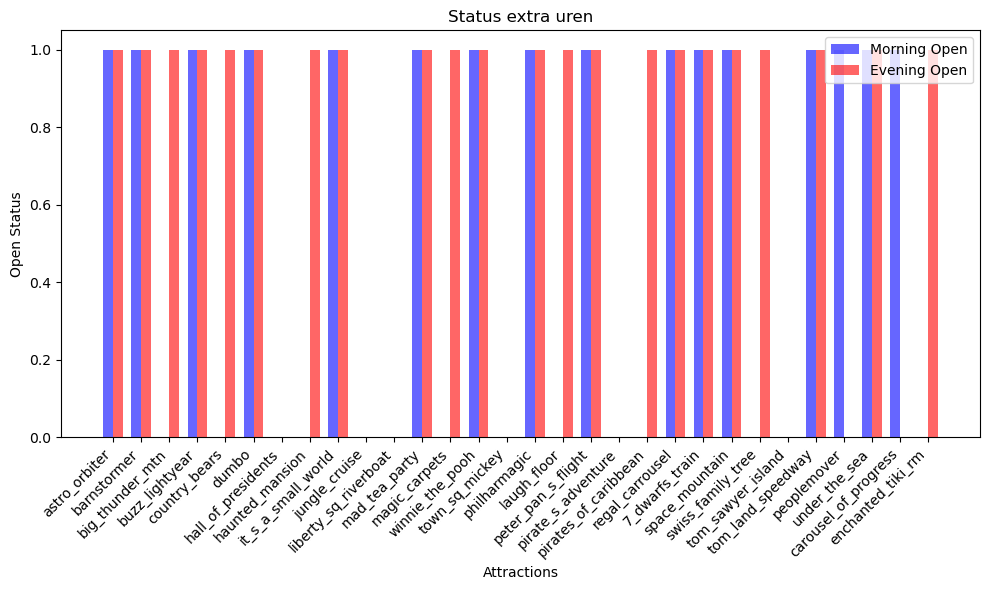

In [ ]:
df_entities_extra_filtered['open_emh_morning'] = df_entities_extra_filtered['open_emh_morning'].astype(int)
df_entities_extra_filtered['open_emh_evening'] = df_entities_extra_filtered['open_emh_evening'].astype(int)

x = np.arange(len(df_entities_extra_filtered['merge_name']))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, df_entities_extra_filtered['open_emh_morning'], width, label='Morning Open', color='blue', alpha=0.6)
plt.bar(x + width/2, df_entities_extra_filtered['open_emh_evening'], width, label='Evening Open', color='red', alpha=0.6)

plt.title('Status extra uren')
plt.xlabel('Attractions')
plt.ylabel('Open Status')
plt.xticks(x, df_entities_extra_filtered['merge_name'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

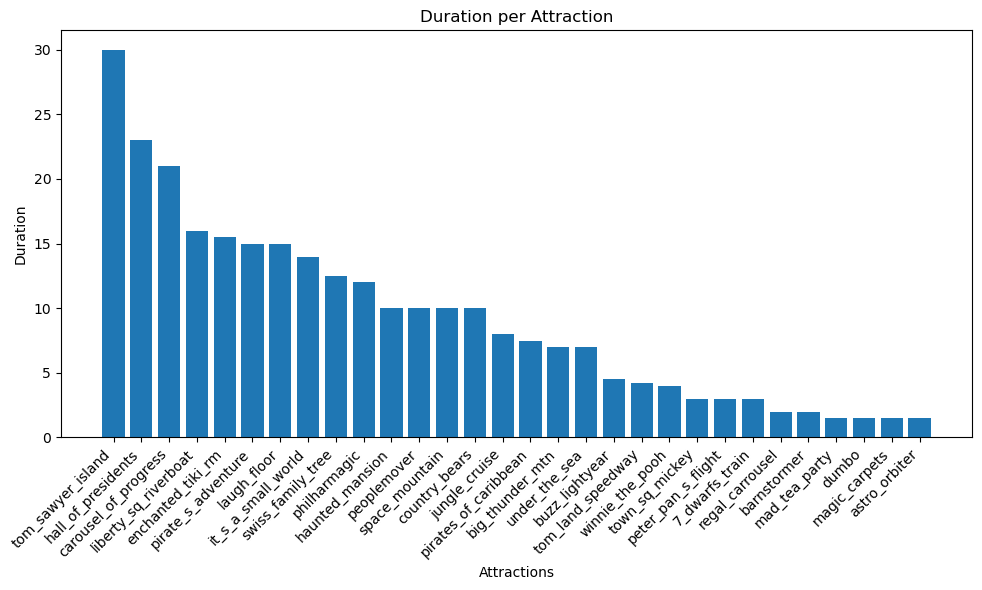

In [29]:
df_entities_extra_filtered.sort_values(by='duration', ascending=False, inplace=True)

plt.figure(figsize=(10, 6)) 
plt.bar(df_entities_extra_filtered['merge_name'], df_entities_extra_filtered['duration'])


plt.title('Duration per Attraction')
plt.xlabel('Attractions')
plt.ylabel('Duration')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

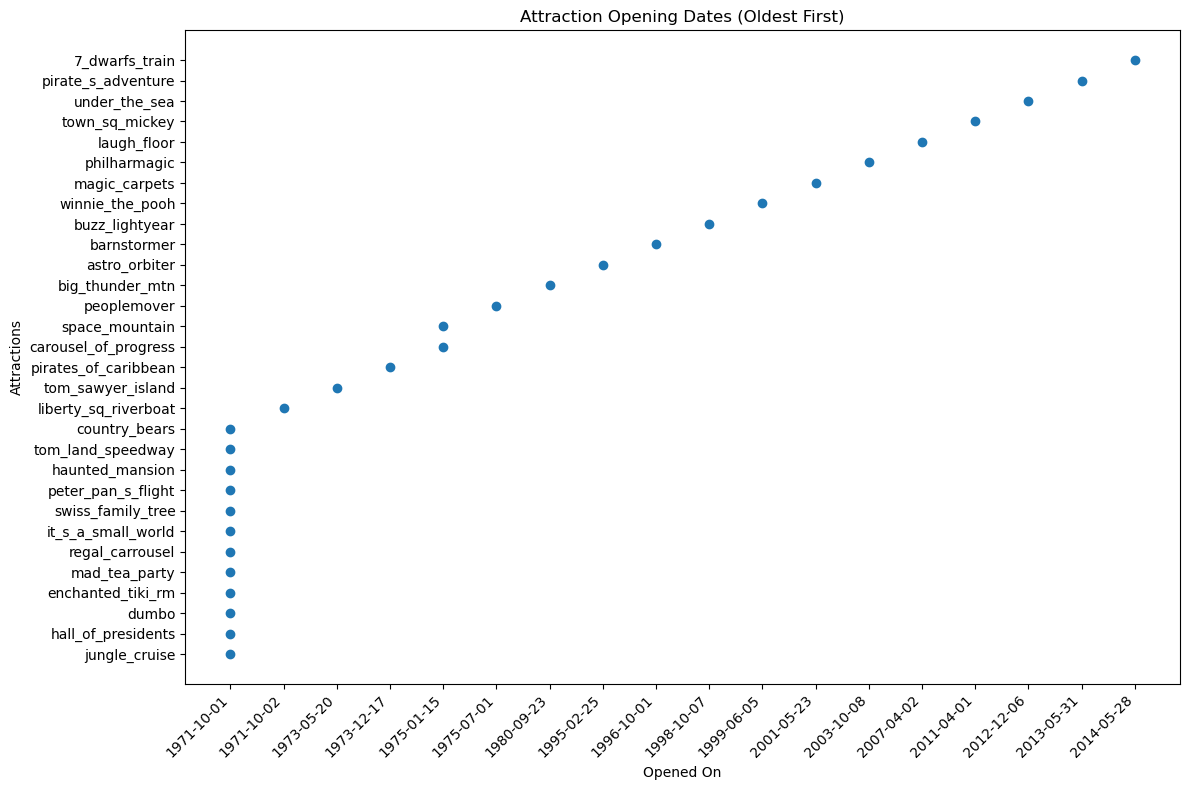

In [30]:
# de datums zijn objecten dus nog niet goed voor 'berekeningen', veel zal hier ookniet mee gedaan worden

df_entities_extra_filtered.sort_values(by='opened_on', ascending=True, inplace=True)

plt.figure(figsize=(12, 8))
plt.scatter(df_entities_extra_filtered['opened_on'],df_entities_extra_filtered['merge_name'])

plt.title('Attraction Opening Dates (Oldest First)')
plt.xlabel('Opened On')
plt.ylabel('Attractions')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [31]:
col_names = list(df_entities_extra_filtered)

for col in col_names:
      unique_values = set(df_entities_extra_filtered[col].dropna().explode())
      print(f"'{col}': {unique_values}")

'name': {'Mad Tea Party', 'Tomorrowland Speedway', "Buzz Lightyear's Space Ranger Spin", 'Pirates of the Caribbean', 'Monsters, Inc. Laugh Floor', 'The Magic Carpets of Aladdin', 'The Haunted Mansion', "Peter Pan's Flight", "Walt Disney's Enchanted Tiki Room", 'The Barnstormer', 'Country Bear Jamboree', 'Liberty Square Riverboat', 'Prince Charming Regal Carrousel', 'Seven Dwarfs Mine Train', 'Jungle Cruise', 'Tom Sawyer Island', "A Pirate's Adventure ~ Treasures of the Seven Seas", 'Big Thunder Mountain Railroad', "Walt Disney's Carousel of Progress", 'Dumbo the Flying Elephant', 'Meet Mickey at Town Square Theater', 'The Many Adventures of Winnie the Pooh', 'Swiss Family Treehouse', 'Under the Sea ~ Journey of the Little Mermaid', 'Astro Orbiter', 'The Hall of Presidents', "Mickey's PhilharMagic", 'Tomorrowland Transit Authority PeopleMover', '"it\'s a small world"', 'Space Mountain'}
'open_emh_morning': {0, 1}
'open_emh_evening': {0, 1}
'open_very_merry': {0, 1}
'open_not_so_scary': 

_________________________________________________________________________________________________

metadata

In [16]:
df_metadata_all = pd.read_csv(('../data/overview data/metadata.csv'))

display(df_metadata_all.head())

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2015,NaN,5,0,0,1,2015,CHRISTMAS PEAK,0,5,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,01/02/2015,NaN,6,1,0,1,2015,CHRISTMAS,2,5,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,01/03/2015,NaN,7,2,0,1,2015,CHRISTMAS,3,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,01/04/2015,NaN,1,3,1,1,2015,CHRISTMAS,4,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,01/05/2015,NaN,2,4,1,1,2015,CHRISTMAS,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
col_names = list(df_metadata_all)

for col in col_names:
      unique_values = set(df_metadata_all[col].dropna().explode())
      print(f"'{col}': {unique_values}")

'DATE'
'WDW_TICKET_SEASON'
'DAYOFWEEK'
'DAYOFYEAR'
'WEEKOFYEAR'
'MONTHOFYEAR'
'YEAR'
'SEASON'
'HOLIDAYPX'
'HOLIDAYM'
'HOLIDAYN'
'HOLIDAY'
'WDWTICKETSEASON'
'WDWRaceN'
'WDWeventN'
'WDWevent'
'WDWrace'
'WDWSEASON'
'WDWMAXTEMP'
'WDWMINTEMP'
'WDWMEANTEMP'
'MKeventN'
'MKevent'
'EPeventN'
'EPevent'
'HSeventN'
'HSevent'
'AKeventN'
'AKevent'
'HOLIDAYJ'
'inSession'
'inSession_Enrollment'
'inSession_wdw'
'inSession_dlr'
'inSession_sqrt_WDW'
'inSession_sqrt_DLR'
'inSession_California'
'inSession_DC'
'inSession_Central_FL'
'inSession_Drive1_FL'
'inSession_Drive2_FL'
'inSession_Drive_CA'
'inSession_Florida'
'inSession_Mardi_Gras'
'inSession_Midwest'
'inSession_NY_NJ'
'inSession_NY_NJ_PA'
'inSession_New_England'
'inSession_New_Jersey'
'inSession_Nothwest'
'INSESSION_PLANES'
'inSession_SoCal'
'inSession_Southwest'
'MKEMHMORN'
'MKEMHMYEST'
'MKEMHMTOM'
'MKEMHEVE'
'MKHOURSEMH'
'MKHOURSEMHYEST'
'MKHOURSEMHTOM'
'MKEMHEYEST'
'MKEMHETOM'
'EPEMHMORN'
'EPEMHMYEST'
'EPEMHMTOM'
'EPEMHEVE'
'EPEMHEYEST'
'EPEMHETO

____________________________________________

In [34]:
col_to_del = ['WDW_TICKET_SEASON','WDWeventN','WDWRaceN','WDWevent','WDWrace','inSession_Enrollment', 'inSession_wdw', 'inSession_dlr', 'inSession_sqrt_WDW','inSession_sqrt_DLR', 'inSession_California', 'inSession_DC', 'inSession_Central_FL',
        'inSession_Drive1_FL', 'inSession_Drive2_FL', 'inSession_Drive_CA', 'inSession_Florida','inSession_Mardi_Gras', 'inSession_Midwest', 'inSession_NY_NJ', 'inSession_NY_NJ_PA',
        'inSession_New_England', 'inSession_New_Jersey', 'inSession_Nothwest', 'INSESSION_PLANES','inSession_SoCal', 'inSession_Southwest','MKeventN','MKevent','EPeventN','EPevent','HSeventN','HSevent',
        'AKeventN','AKevent','HOLIDAYJ', 'WDWTICKETSEASON'
    ]

df_metadata = df_metadata_all.drop(col_to_del, axis= 1)

In [35]:
df_metadata['DATE'] = pd.to_datetime(df_metadata['DATE'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
display(df_metadata)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,HOLIDAYN,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,0,5,nyd,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2015-01-02,6,1,0,1,2015,CHRISTMAS,2,5,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2015-01-03,7,2,0,1,2015,CHRISTMAS,3,0,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2015-01-04,1,3,1,1,2015,CHRISTMAS,4,0,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2015-01-05,2,4,1,1,2015,CHRISTMAS,5,0,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,6,238,34,8,2021,NaN,11,0,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2075,2021-08-28,7,239,34,8,2021,NaN,10,0,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2076,2021-08-29,1,240,35,8,2021,NaN,9,0,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2077,2021-08-30,2,241,35,8,2021,NaN,8,0,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [36]:
column_names = df_metadata.columns.tolist()
print(column_names)

['DATE', 'DAYOFWEEK', 'DAYOFYEAR', 'WEEKOFYEAR', 'MONTHOFYEAR', 'YEAR', 'SEASON', 'HOLIDAYPX', 'HOLIDAYM', 'HOLIDAYN', 'HOLIDAY', 'WDWSEASON', 'WDWMAXTEMP', 'WDWMINTEMP', 'WDWMEANTEMP', 'inSession', 'MKEMHMORN', 'MKEMHMYEST', 'MKEMHMTOM', 'MKEMHEVE', 'MKHOURSEMH', 'MKHOURSEMHYEST', 'MKHOURSEMHTOM', 'MKEMHEYEST', 'MKEMHETOM', 'EPEMHMORN', 'EPEMHMYEST', 'EPEMHMTOM', 'EPEMHEVE', 'EPEMHEYEST', 'EPEMHETOM', 'EPHOURSEMH', 'EPHOURSEMHYEST', 'EPHOURSEMHTOM', 'HSEMHMORN', 'HSEMHMYEST', 'HSEMHMTOM', 'HSEMHEVE', 'HSEMHEYEST', 'HSEMHETOM', 'HSHOURSEMH', 'HSHOURSEMHYEST', 'HSHOURSEMHTOM', 'AKEMHMORN', 'AKEMHMYEST', 'AKEMHMTOM', 'AKEMHEVE', 'AKEMHEYEST', 'AKEMHETOM', 'AKHOURSEMH', 'AKHOURSEMHYEST', 'AKHOURSEMHTOM', 'MKOPEN', 'MKCLOSE', 'MKHOURS', 'MKEMHOPEN', 'MKEMHCLOSE', 'MKOPENYEST', 'MKCLOSEYEST', 'MKHOURSYEST', 'MKOPENTOM', 'MKCLOSETOM', 'MKHOURSTOM', 'EPOPEN', 'EPCLOSE', 'EPHOURS', 'EPEMHOPEN', 'EPEMHCLOSE', 'EPOPENYEST', 'EPCLOSEYEST', 'EPHOURSYEST', 'EPOPENTOM', 'EPCLOSETOM', 'EPHOURSTOM', '

In [ ]:
df_main_variables_meta = df_metadata[['DATE','DAYOFWEEK','DAYOFYEAR','WEEKOFYEAR','MONTHOFYEAR','YEAR','SEASON','HOLIDAYPX','HOLIDAYM','HOLIDAYN','HOLIDAY', 'WDWSEASON', 'inSession']].copy()
display(df_main_variables_meta)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,HOLIDAYN,HOLIDAY,WDWSEASON,inSession
0,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,0,5,nyd,1,CHRISTMAS PEAK,0%
1,2015-01-02,6,1,0,1,2015,CHRISTMAS,2,5,NaN,0,CHRISTMAS,0%
2,2015-01-03,7,2,0,1,2015,CHRISTMAS,3,0,NaN,0,CHRISTMAS,0%
3,2015-01-04,1,3,1,1,2015,CHRISTMAS,4,0,NaN,0,CHRISTMAS,67%
4,2015-01-05,2,4,1,1,2015,CHRISTMAS,5,0,NaN,0,CHRISTMAS,67%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,6,238,34,8,2021,NaN,11,0,NaN,0,SEPTEMBER LOW,NaN
2075,2021-08-28,7,239,34,8,2021,NaN,10,0,NaN,0,SEPTEMBER LOW,NaN
2076,2021-08-29,1,240,35,8,2021,NaN,9,0,NaN,0,SEPTEMBER LOW,NaN
2077,2021-08-30,2,241,35,8,2021,NaN,8,0,NaN,0,SEPTEMBER LOW,NaN


In [38]:
df_weather_variables_meta = df_metadata[['DATE', 'DAYOFWEEK', 'DAYOFYEAR', 'WEEKOFYEAR', 'MONTHOFYEAR', 'YEAR', 'WDWMAXTEMP', 'WDWMINTEMP', 'WDWMEANTEMP', 'WEATHER_WDWHIGH', 'WEATHER_WDWLOW', 'WEATHER_WDWPRECIP']].copy()

display(df_weather_variables_meta)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP
0,2015-01-01,5,0,0,1,2015,73.02,59.81,66.41,70.3,50.2,0.12
1,2015-01-02,6,1,0,1,2015,78.00,60.72,69.36,70.3,50.0,0.12
2,2015-01-03,7,2,0,1,2015,83.12,67.31,75.22,70.3,49.9,0.07
3,2015-01-04,1,3,1,1,2015,83.93,67.97,75.95,70.3,49.8,0.12
4,2015-01-05,2,4,1,1,2015,72.30,56.89,64.60,70.3,49.6,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,6,238,34,8,2021,86.15,77.19,81.67,91.0,75.2,0.28
2075,2021-08-28,7,239,34,8,2021,91.67,77.36,84.52,90.9,75.1,0.23
2076,2021-08-29,1,240,35,8,2021,89.08,78.09,83.59,90.8,75.1,0.28
2077,2021-08-30,2,241,35,8,2021,87.28,78.76,83.02,90.8,75.1,0.23


In [39]:
df_emh_variables_meta = df_metadata[['DATE','DAYOFWEEK','DAYOFYEAR','WEEKOFYEAR','MONTHOFYEAR','YEAR', 'MKEMHMORN', 'MKEMHMYEST', 'MKEMHMTOM', 
                                     'MKEMHEVE', 'MKHOURSEMH', 'MKHOURSEMHYEST', 'MKHOURSEMHTOM', 'MKEMHEYEST', 'MKEMHETOM', 'EPEMHMORN', 'EPEMHMYEST', 
                                     'EPEMHMTOM', 'EPEMHEVE', 'EPEMHEYEST', 'EPEMHETOM', 'EPHOURSEMH', 'EPHOURSEMHYEST', 'EPHOURSEMHTOM', 'HSEMHMORN', 
                                     'HSEMHMYEST', 'HSEMHMTOM', 'HSEMHEVE', 'HSEMHEYEST', 'HSEMHETOM', 'HSHOURSEMH', 'HSHOURSEMHYEST', 'HSHOURSEMHTOM', 
                                     'AKEMHMORN', 'AKEMHMYEST', 'AKEMHMTOM', 'AKEMHEVE', 'AKEMHEYEST', 'AKEMHETOM', 'AKHOURSEMH', 'AKHOURSEMHYEST', 'AKHOURSEMHTOM']].copy()

display(df_emh_variables_meta)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,MKEMHMORN,MKEMHMYEST,MKEMHMTOM,MKEMHEVE,...,HSHOURSEMHTOM,AKEMHMORN,AKEMHMYEST,AKEMHMTOM,AKEMHEVE,AKEMHEYEST,AKEMHETOM,AKHOURSEMH,AKHOURSEMHYEST,AKHOURSEMHTOM
0,2015-01-01,5,0,0,1,2015,1,1,0,0,...,14.0,0,1,0,0,0,0,11.0,15.0,12.0
1,2015-01-02,6,1,0,1,2015,0,1,0,0,...,14.0,0,0,0,0,0,0,12.0,11.0,11.0
2,2015-01-03,7,2,0,1,2015,0,0,0,0,...,11.0,0,0,1,0,0,0,11.0,12.0,12.0
3,2015-01-04,1,3,1,1,2015,0,0,0,0,...,13.0,1,0,0,0,0,0,12.0,11.0,8.0
4,2015-01-05,2,4,1,1,2015,0,0,0,0,...,10.0,0,1,0,0,0,0,8.0,12.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,6,238,34,8,2021,0,0,0,0,...,12.0,0,0,0,0,0,0,11.0,11.0,12.0
2075,2021-08-28,7,239,34,8,2021,0,0,0,0,...,12.0,0,0,0,0,0,0,12.0,11.0,11.0
2076,2021-08-29,1,240,35,8,2021,0,0,0,0,...,12.0,0,0,0,0,0,0,11.0,12.0,11.0
2077,2021-08-30,2,241,35,8,2021,0,0,0,0,...,12.0,0,0,0,0,0,0,11.0,11.0,11.0


In [40]:
df_opening_hours_variables_meta = df_metadata[['DATE','DAYOFWEEK','DAYOFYEAR','WEEKOFYEAR','MONTHOFYEAR','YEAR', 
                                               'MKOPEN', 'MKCLOSE', 'MKHOURS', 'MKEMHOPEN', 'MKEMHCLOSE', 'MKOPENYEST', 'MKCLOSEYEST', 'MKHOURSYEST', 'MKOPENTOM', 'MKCLOSETOM', 'MKHOURSTOM', 
                                               'EPOPEN', 'EPCLOSE', 'EPHOURS', 'EPEMHOPEN', 'EPEMHCLOSE', 'EPOPENYEST', 'EPCLOSEYEST', 'EPHOURSYEST', 'EPOPENTOM', 'EPCLOSETOM', 'EPHOURSTOM', 
                                               'HSOPEN', 'HSCLOSE', 'HSHOURS', 'HSEMHOPEN', 'HSEMHCLOSE', 'HSOPENYEST', 'HSCLOSEYEST', 'HSHOURSYEST', 'HSOPENTOM', 'HSCLOSETOM', 'HSHOURSTOM', 
                                               'AKOPEN', 'AKCLOSE', 'AKHOURS', 'AKEMHOPEN', 'AKEMHCLOSE', 'AKOPENYEST', 'AKCLOSEYEST', 'AKHOURSYEST', 'AKOPENTOM', 'AKCLOSETOM', 'AKHOURSTOM']].copy()

display(df_opening_hours_variables_meta)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,MKOPEN,MKCLOSE,MKHOURS,MKEMHOPEN,...,AKCLOSE,AKHOURS,AKEMHOPEN,AKEMHCLOSE,AKOPENYEST,AKCLOSEYEST,AKHOURSYEST,AKOPENTOM,AKCLOSETOM,AKHOURSTOM
0,2015-01-01,5,0,0,1,2015,08:00,25:00:00,17.0,07:00,...,19:00,11.0,08:00,19:00,08:00,22:00,14.0,08:00,20:00,12.0
1,2015-01-02,6,1,0,1,2015,08:00,25:00:00,17.0,08:00,...,20:00,12.0,08:00,20:00,08:00,19:00,11.0,08:00,19:00,11.0
2,2015-01-03,7,2,0,1,2015,09:00,25:00:00,16.0,09:00,...,19:00,11.0,08:00,19:00,08:00,20:00,12.0,09:00,20:00,11.0
3,2015-01-04,1,3,1,1,2015,09:00,24:00:00,15.0,09:00,...,20:00,11.0,08:00,20:00,08:00,19:00,11.0,09:00,17:00,8.0
4,2015-01-05,2,4,1,1,2015,09:00,23:00,14.0,09:00,...,17:00,8.0,09:00,17:00,09:00,20:00,11.0,09:00,17:00,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,6,238,34,8,2021,09:00,21:00,12.0,09:00,...,19:00,11.0,08:00,19:00,08:00,19:00,11.0,08:00,20:00,12.0
2075,2021-08-28,7,239,34,8,2021,09:00,21:00,12.0,09:00,...,20:00,12.0,08:00,20:00,08:00,19:00,11.0,08:00,19:00,11.0
2076,2021-08-29,1,240,35,8,2021,09:00,21:00,12.0,09:00,...,19:00,11.0,08:00,19:00,08:00,20:00,12.0,08:00,19:00,11.0
2077,2021-08-30,2,241,35,8,2021,09:00,21:00,12.0,09:00,...,19:00,11.0,08:00,19:00,08:00,19:00,11.0,08:00,19:00,11.0


In [41]:
df_capacity_variables_meta = df_metadata[['DATE','DAYOFWEEK','DAYOFYEAR','WEEKOFYEAR','MONTHOFYEAR','YEAR', 
                                          'CapacityLost_MK', 'CapacityLost_EP', 'CapacityLost_HS', 'CapacityLost_AK', 
                                          'CapacityLostWGT_MK', 'CapacityLostWGT_EP', 'CapacityLostWGT_HS', 'CapacityLostWGT_AK']].copy()

display(df_capacity_variables_meta)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,CapacityLost_MK,CapacityLost_EP,CapacityLost_HS,CapacityLost_AK,CapacityLostWGT_MK,CapacityLostWGT_EP,CapacityLostWGT_HS,CapacityLostWGT_AK
0,2015-01-01,5,0,0,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
1,2015-01-02,6,1,0,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
2,2015-01-03,7,2,0,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
3,2015-01-04,1,3,1,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
4,2015-01-05,2,4,1,1,2015,354065,325168,213779,210779,34671235,31692832,20802421,20790321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,6,238,34,8,2021,433057,381963,311870,231777,42582443,36668737,29761030,22775123
2075,2021-08-28,7,239,34,8,2021,433057,381963,311870,231777,42582443,36668737,29761030,22775123
2076,2021-08-29,1,240,35,8,2021,433057,381963,311870,231777,42582443,36668737,29761030,22775123
2077,2021-08-30,2,241,35,8,2021,433057,381963,311870,231777,42582443,36668737,29761030,22775123


In [42]:
#parades or evening shows
df_extra_variables_meta = df_metadata[['DATE','DAYOFWEEK','DAYOFYEAR','WEEKOFYEAR','MONTHOFYEAR','YEAR', 
                                       'MKPRDDAY', 'MKPRDDT1', 'MKPRDDT2', 'MKPRDDN', 'MKPRDNGT', 'MKPRDNT1', 'MKPRDNT2', 
                                       'MKPRDNN', 'MKFIREWK', 'MKFIRET1', 'MKFIRET2', 'MKFIREN', 'EPFIREWK', 'EPFIRET1', 
                                       'EPFIRET2', 'EPFIREN', 'HSPRDDAY', 'HSPRDDT1', 'HSPRDDN', 'HSFIREWK', 'HSFIRET1', 
                                       'HSFIRET2', 'HSFIREN', 'HSSHWNGT', 'HSSHWNT1', 'HSSHWNT2', 'HSSHWNN', 'HSFIREWKS',
                                       'AKPRDDAY', 'AKPRDDT1', 'AKPRDDT2', 'AKPRDDN', 'AKFIREN', 'AKSHWNGT', 'AKSHWNT1', 'AKSHWNT2', 'AKSHWNN']].copy()

display(df_extra_variables_meta)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,MKPRDDAY,MKPRDDT1,MKPRDDT2,MKPRDDN,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2015-01-01,5,0,0,1,2015,2,12:00,15:30,Disney Festival of Fantasy Parade,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2015-01-02,6,1,0,1,2015,2,12:00,15:30,Disney Festival of Fantasy Parade,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2015-01-03,7,2,0,1,2015,2,12:00,15:30,Disney Festival of Fantasy Parade,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2015-01-04,1,3,1,1,2015,1,15:00,NaN,Disney Festival of Fantasy Parade,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2015-01-05,2,4,1,1,2015,1,15:00,NaN,Disney Festival of Fantasy Parade,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,6,238,34,8,2021,0,NaN,NaN,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2075,2021-08-28,7,239,34,8,2021,0,NaN,NaN,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2076,2021-08-29,1,240,35,8,2021,0,NaN,NaN,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2077,2021-08-30,2,241,35,8,2021,0,NaN,NaN,NaN,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


____________________________

exploration

In [63]:
df_waiting_times_interpolated = pd.read_csv("../data/clean/waiting_times_interpolated.csv", index_col=0)
display(df_waiting_times_interpolated.head())

,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted
0,2015-01-01,astro_orbiter,0,NaN,NaN,NaN,NaN
1,2015-01-01,astro_orbiter,30,NaN,NaN,NaN,NaN
2,2015-01-01,astro_orbiter,60,NaN,NaN,NaN,NaN
3,2015-01-01,astro_orbiter,90,NaN,NaN,NaN,NaN
4,2015-01-01,astro_orbiter,120,NaN,NaN,NaN,NaN


In [64]:
df_waiting_times_entities_unfiltered = pd.merge(df_waiting_times_interpolated, df_entities_extra_filtered, left_on='attraction', right_on='merge_name', how='left')
display(df_waiting_times_entities_unfiltered.head())

,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted,name,open_emh_morning,open_emh_evening,...,opened_on,not_to_be_missed,rider_swap,crazy_threshold,allow_time_restriction,flexible_duration,operator_type,climate_controlled,fastpass_average_minutes_saved,merge_name
0,2015-01-01,astro_orbiter,0,NaN,NaN,NaN,NaN,Astro Orbiter,1.0,1.0,...,1995-02-25,False,False,150.0,False,False,Attraction,False,0.0,astro_orbiter
1,2015-01-01,astro_orbiter,30,NaN,NaN,NaN,NaN,Astro Orbiter,1.0,1.0,...,1995-02-25,False,False,150.0,False,False,Attraction,False,0.0,astro_orbiter
2,2015-01-01,astro_orbiter,60,NaN,NaN,NaN,NaN,Astro Orbiter,1.0,1.0,...,1995-02-25,False,False,150.0,False,False,Attraction,False,0.0,astro_orbiter
3,2015-01-01,astro_orbiter,90,NaN,NaN,NaN,NaN,Astro Orbiter,1.0,1.0,...,1995-02-25,False,False,150.0,False,False,Attraction,False,0.0,astro_orbiter
4,2015-01-01,astro_orbiter,120,NaN,NaN,NaN,NaN,Astro Orbiter,1.0,1.0,...,1995-02-25,False,False,150.0,False,False,Attraction,False,0.0,astro_orbiter


In [65]:
df_waiting_times_entities = pd.merge(df_waiting_times_interpolated, df_entities_extra_filtered, left_on='attraction', right_on='merge_name')
display(df_waiting_times_entities.head())

,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted,name,open_emh_morning,open_emh_evening,...,opened_on,not_to_be_missed,rider_swap,crazy_threshold,allow_time_restriction,flexible_duration,operator_type,climate_controlled,fastpass_average_minutes_saved,merge_name
0,2015-01-01,astro_orbiter,0,NaN,NaN,NaN,NaN,Astro Orbiter,1,1,...,1995-02-25,False,False,150,False,False,Attraction,False,0,astro_orbiter
1,2015-01-01,astro_orbiter,30,NaN,NaN,NaN,NaN,Astro Orbiter,1,1,...,1995-02-25,False,False,150,False,False,Attraction,False,0,astro_orbiter
2,2015-01-01,astro_orbiter,60,NaN,NaN,NaN,NaN,Astro Orbiter,1,1,...,1995-02-25,False,False,150,False,False,Attraction,False,0,astro_orbiter
3,2015-01-01,astro_orbiter,90,NaN,NaN,NaN,NaN,Astro Orbiter,1,1,...,1995-02-25,False,False,150,False,False,Attraction,False,0,astro_orbiter
4,2015-01-01,astro_orbiter,120,NaN,NaN,NaN,NaN,Astro Orbiter,1,1,...,1995-02-25,False,False,150,False,False,Attraction,False,0,astro_orbiter


In [66]:
display(df_main_variables_meta.head())
display(df_weather_variables_meta.head())
display(df_emh_variables_meta.head())
display(df_opening_hours_variables_meta.head())
display(df_capacity_variables_meta.head())
display(df_extra_variables_meta.head())

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,HOLIDAYN,HOLIDAY,WDWSEASON,inSession
0,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,0,5,nyd,1,CHRISTMAS PEAK,0%
1,2015-01-02,6,1,0,1,2015,CHRISTMAS,2,5,NaN,0,CHRISTMAS,0%
2,2015-01-03,7,2,0,1,2015,CHRISTMAS,3,0,NaN,0,CHRISTMAS,0%
3,2015-01-04,1,3,1,1,2015,CHRISTMAS,4,0,NaN,0,CHRISTMAS,67%
4,2015-01-05,2,4,1,1,2015,CHRISTMAS,5,0,NaN,0,CHRISTMAS,67%


,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP
0,2015-01-01,5,0,0,1,2015,73.02,59.81,66.41,70.3,50.2,0.12
1,2015-01-02,6,1,0,1,2015,78.00,60.72,69.36,70.3,50.0,0.12
2,2015-01-03,7,2,0,1,2015,83.12,67.31,75.22,70.3,49.9,0.07
3,2015-01-04,1,3,1,1,2015,83.93,67.97,75.95,70.3,49.8,0.12
4,2015-01-05,2,4,1,1,2015,72.30,56.89,64.60,70.3,49.6,0.12


,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,MKEMHMORN,MKEMHMYEST,MKEMHMTOM,MKEMHEVE,...,HSHOURSEMHTOM,AKEMHMORN,AKEMHMYEST,AKEMHMTOM,AKEMHEVE,AKEMHEYEST,AKEMHETOM,AKHOURSEMH,AKHOURSEMHYEST,AKHOURSEMHTOM
0,2015-01-01,5,0,0,1,2015,1,1,0,0,...,14.0,0,1,0,0,0,0,11.0,15.0,12.0
1,2015-01-02,6,1,0,1,2015,0,1,0,0,...,14.0,0,0,0,0,0,0,12.0,11.0,11.0
2,2015-01-03,7,2,0,1,2015,0,0,0,0,...,11.0,0,0,1,0,0,0,11.0,12.0,12.0
3,2015-01-04,1,3,1,1,2015,0,0,0,0,...,13.0,1,0,0,0,0,0,12.0,11.0,8.0
4,2015-01-05,2,4,1,1,2015,0,0,0,0,...,10.0,0,1,0,0,0,0,8.0,12.0,8.0


,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,MKOPEN,MKCLOSE,MKHOURS,MKEMHOPEN,...,AKCLOSE,AKHOURS,AKEMHOPEN,AKEMHCLOSE,AKOPENYEST,AKCLOSEYEST,AKHOURSYEST,AKOPENTOM,AKCLOSETOM,AKHOURSTOM
0,2015-01-01,5,0,0,1,2015,08:00,25:00:00,17.0,07:00,...,19:00,11.0,08:00,19:00,08:00,22:00,14.0,08:00,20:00,12.0
1,2015-01-02,6,1,0,1,2015,08:00,25:00:00,17.0,08:00,...,20:00,12.0,08:00,20:00,08:00,19:00,11.0,08:00,19:00,11.0
2,2015-01-03,7,2,0,1,2015,09:00,25:00:00,16.0,09:00,...,19:00,11.0,08:00,19:00,08:00,20:00,12.0,09:00,20:00,11.0
3,2015-01-04,1,3,1,1,2015,09:00,24:00:00,15.0,09:00,...,20:00,11.0,08:00,20:00,08:00,19:00,11.0,09:00,17:00,8.0
4,2015-01-05,2,4,1,1,2015,09:00,23:00,14.0,09:00,...,17:00,8.0,09:00,17:00,09:00,20:00,11.0,09:00,17:00,8.0


,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,CapacityLost_MK,CapacityLost_EP,CapacityLost_HS,CapacityLost_AK,CapacityLostWGT_MK,CapacityLostWGT_EP,CapacityLostWGT_HS,CapacityLostWGT_AK
0,2015-01-01,5,0,0,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
1,2015-01-02,6,1,0,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
2,2015-01-03,7,2,0,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
3,2015-01-04,1,3,1,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
4,2015-01-05,2,4,1,1,2015,354065,325168,213779,210779,34671235,31692832,20802421,20790321


,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,MKPRDDAY,MKPRDDT1,MKPRDDT2,MKPRDDN,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2015-01-01,5,0,0,1,2015,2,12:00,15:30,Disney Festival of Fantasy Parade,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2015-01-02,6,1,0,1,2015,2,12:00,15:30,Disney Festival of Fantasy Parade,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2015-01-03,7,2,0,1,2015,2,12:00,15:30,Disney Festival of Fantasy Parade,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2015-01-04,1,3,1,1,2015,1,15:00,NaN,Disney Festival of Fantasy Parade,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2015-01-05,2,4,1,1,2015,1,15:00,NaN,Disney Festival of Fantasy Parade,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [67]:
df_waiting_times_main_meta = pd.merge(df_waiting_times_interpolated, df_main_variables_meta, left_on='date', right_on='DATE')
display(df_waiting_times_main_meta.head())

,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,HOLIDAYN,HOLIDAY,WDWSEASON,inSession
0,2015-01-01,astro_orbiter,0,NaN,NaN,NaN,NaN,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,0,5,nyd,1,CHRISTMAS PEAK,0%
1,2015-01-01,astro_orbiter,30,NaN,NaN,NaN,NaN,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,0,5,nyd,1,CHRISTMAS PEAK,0%
2,2015-01-01,astro_orbiter,60,NaN,NaN,NaN,NaN,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,0,5,nyd,1,CHRISTMAS PEAK,0%
3,2015-01-01,astro_orbiter,90,NaN,NaN,NaN,NaN,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,0,5,nyd,1,CHRISTMAS PEAK,0%
4,2015-01-01,astro_orbiter,120,NaN,NaN,NaN,NaN,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,0,5,nyd,1,CHRISTMAS PEAK,0%


In [68]:
df_waiting_times_emh_meta = pd.merge(df_waiting_times_interpolated, df_emh_variables_meta, left_on='date', right_on='DATE')
display(df_waiting_times_emh_meta.head())

,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted,DATE,DAYOFWEEK,DAYOFYEAR,...,HSHOURSEMHTOM,AKEMHMORN,AKEMHMYEST,AKEMHMTOM,AKEMHEVE,AKEMHEYEST,AKEMHETOM,AKHOURSEMH,AKHOURSEMHYEST,AKHOURSEMHTOM
0,2015-01-01,astro_orbiter,0,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,14.0,0,1,0,0,0,0,11.0,15.0,12.0
1,2015-01-01,astro_orbiter,30,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,14.0,0,1,0,0,0,0,11.0,15.0,12.0
2,2015-01-01,astro_orbiter,60,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,14.0,0,1,0,0,0,0,11.0,15.0,12.0
3,2015-01-01,astro_orbiter,90,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,14.0,0,1,0,0,0,0,11.0,15.0,12.0
4,2015-01-01,astro_orbiter,120,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,14.0,0,1,0,0,0,0,11.0,15.0,12.0


In [69]:
df_waiting_times_weather_meta = pd.merge(df_waiting_times_interpolated, df_weather_variables_meta, left_on='date', right_on='DATE')
display(df_waiting_times_weather_meta.head())

,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP
0,2015-01-01,astro_orbiter,0,NaN,NaN,NaN,NaN,2015-01-01,5,0,0,1,2015,73.02,59.81,66.41,70.3,50.2,0.12
1,2015-01-01,astro_orbiter,30,NaN,NaN,NaN,NaN,2015-01-01,5,0,0,1,2015,73.02,59.81,66.41,70.3,50.2,0.12
2,2015-01-01,astro_orbiter,60,NaN,NaN,NaN,NaN,2015-01-01,5,0,0,1,2015,73.02,59.81,66.41,70.3,50.2,0.12
3,2015-01-01,astro_orbiter,90,NaN,NaN,NaN,NaN,2015-01-01,5,0,0,1,2015,73.02,59.81,66.41,70.3,50.2,0.12
4,2015-01-01,astro_orbiter,120,NaN,NaN,NaN,NaN,2015-01-01,5,0,0,1,2015,73.02,59.81,66.41,70.3,50.2,0.12


In [70]:
df_waiting_times_o_h_meta = pd.merge(df_waiting_times_interpolated, df_opening_hours_variables_meta, left_on='date', right_on='DATE')
display(df_waiting_times_o_h_meta.head())

,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted,DATE,DAYOFWEEK,DAYOFYEAR,...,AKCLOSE,AKHOURS,AKEMHOPEN,AKEMHCLOSE,AKOPENYEST,AKCLOSEYEST,AKHOURSYEST,AKOPENTOM,AKCLOSETOM,AKHOURSTOM
0,2015-01-01,astro_orbiter,0,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,19:00,11.0,08:00,19:00,08:00,22:00,14.0,08:00,20:00,12.0
1,2015-01-01,astro_orbiter,30,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,19:00,11.0,08:00,19:00,08:00,22:00,14.0,08:00,20:00,12.0
2,2015-01-01,astro_orbiter,60,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,19:00,11.0,08:00,19:00,08:00,22:00,14.0,08:00,20:00,12.0
3,2015-01-01,astro_orbiter,90,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,19:00,11.0,08:00,19:00,08:00,22:00,14.0,08:00,20:00,12.0
4,2015-01-01,astro_orbiter,120,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,19:00,11.0,08:00,19:00,08:00,22:00,14.0,08:00,20:00,12.0


In [71]:
df_waiting_times_capacity_meta = pd.merge(df_waiting_times_interpolated, df_capacity_variables_meta, left_on='date', right_on='DATE')
display(df_waiting_times_capacity_meta.head())

,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted,DATE,DAYOFWEEK,DAYOFYEAR,...,MONTHOFYEAR,YEAR,CapacityLost_MK,CapacityLost_EP,CapacityLost_HS,CapacityLost_AK,CapacityLostWGT_MK,CapacityLostWGT_EP,CapacityLostWGT_HS,CapacityLostWGT_AK
0,2015-01-01,astro_orbiter,0,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
1,2015-01-01,astro_orbiter,30,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
2,2015-01-01,astro_orbiter,60,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
3,2015-01-01,astro_orbiter,90,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321
4,2015-01-01,astro_orbiter,120,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,1,2015,352865,325168,203780,210779,34661635,31692832,19812520,20790321


In [72]:
df_waiting_times_extra_meta = pd.merge(df_waiting_times_interpolated, df_extra_variables_meta, left_on='date', right_on='DATE')
display(df_waiting_times_extra_meta.head())

,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted,DATE,DAYOFWEEK,DAYOFYEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2015-01-01,astro_orbiter,0,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2015-01-01,astro_orbiter,30,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2015-01-01,astro_orbiter,60,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2015-01-01,astro_orbiter,90,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2015-01-01,astro_orbiter,120,NaN,NaN,NaN,NaN,2015-01-01,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


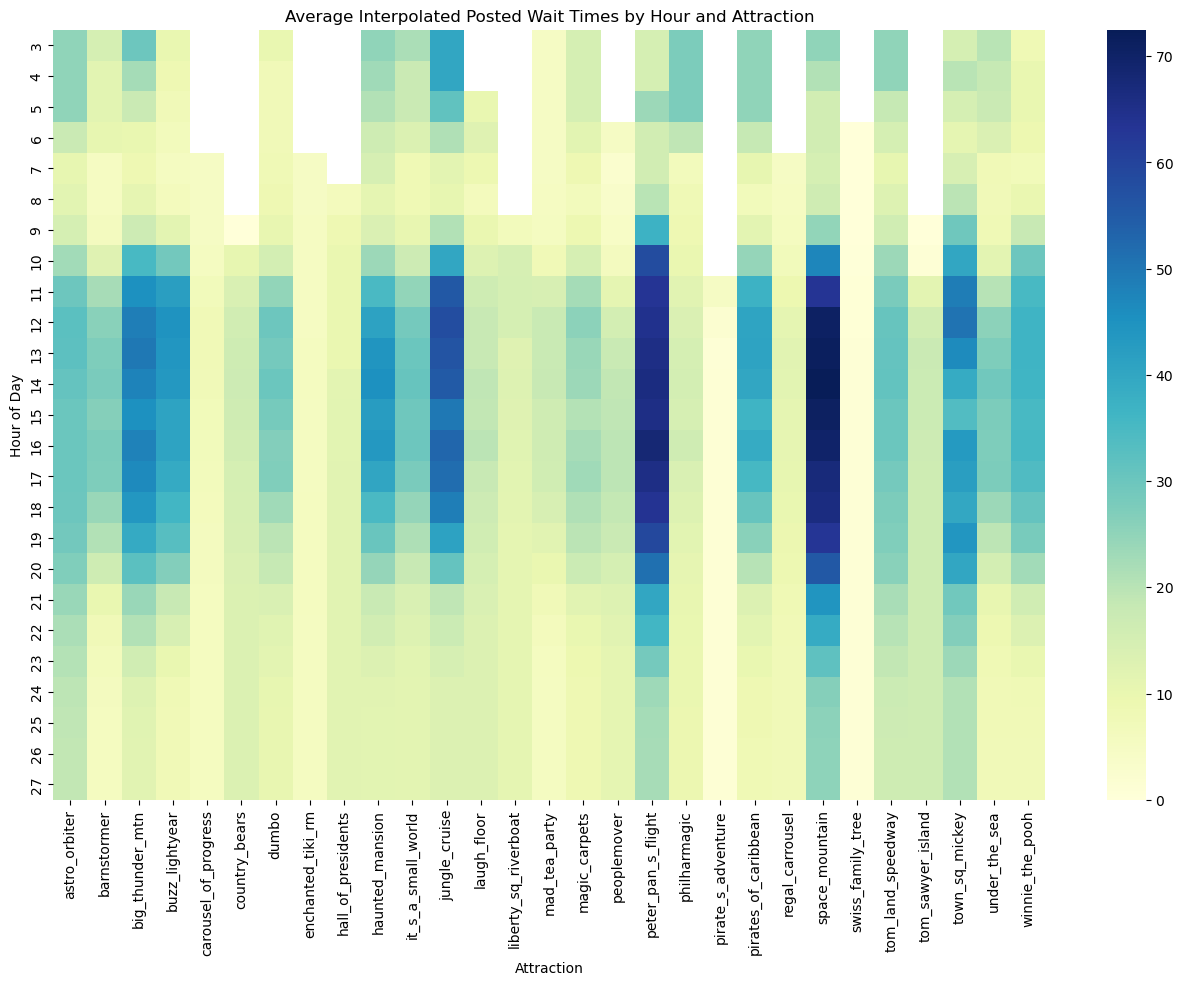

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the 'hour' column
df_waiting_times_entities['hour'] = (df_waiting_times_entities['minute'] // 60).astype(int)

# Heatmap of average SPOSTMIN_interp by hour of day and attraction
pivot_table = df_waiting_times_entities.pivot_table(values='SPOSTMIN_interp', index='hour', columns='attraction', aggfunc='mean')
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Average Interpolated Posted Wait Times by Hour and Attraction')
plt.xlabel('Attraction')
plt.ylabel('Hour of Day')
plt.show()


c:\Users\masha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


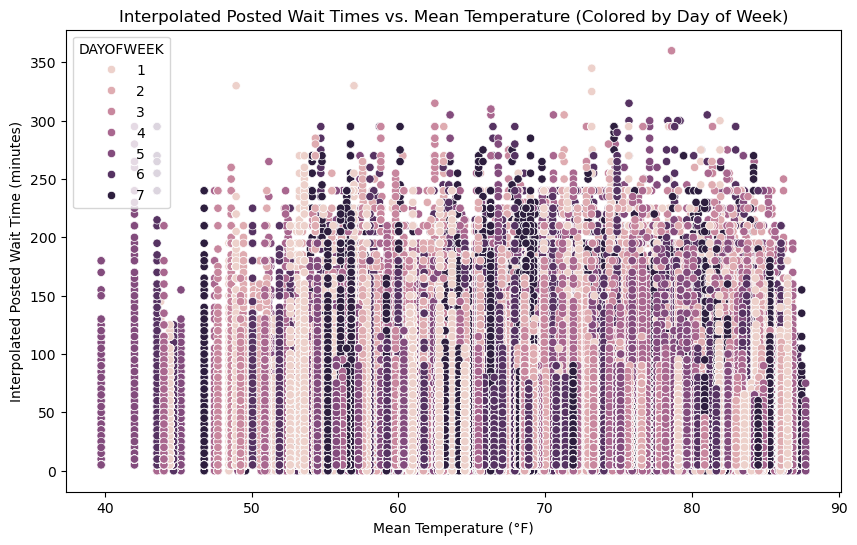

In [75]:
# Example: Scatter plot of SPOSTMIN_interp vs. temperature, colored by day of week.
df_scatter = df_waiting_times_weather_meta.dropna(subset=['SPOSTMIN_interp', 'WDWMEANTEMP', 'DAYOFWEEK'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WDWMEANTEMP', y='SPOSTMIN_interp', hue='DAYOFWEEK', data=df_scatter)
plt.title('Interpolated Posted Wait Times vs. Mean Temperature (Colored by Day of Week)')
plt.xlabel('Mean Temperature (°F)')
plt.ylabel('Interpolated Posted Wait Time (minutes)')
plt.show()



In [59]:
# Example: Scatter plot of SPOSTMIN_interp vs. capacity lost, colored by holiday.
df_scatter = df_waiting_times_capacity_meta.dropna(subset = ['SPOSTMIN_interp', 'CapacityLost_MK', 'HOLIDAY'])
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'CapacityLost_MK', y = 'SPOSTMIN_interp', hue = 'HOLIDAY', data = df_scatter)
plt.title('Interpolated Posted Wait Times vs. Capacity Lost in Magic Kingdom (Colored by Holiday)')
plt.xlabel('Capacity Lost in Magic Kingdom')
plt.ylabel('Interpolated posted wait time (minutes)')
plt.show()

KeyError: ['HOLIDAY']

KeyboardInterrupt: 

<Figure size 1600x800 with 0 Axes>

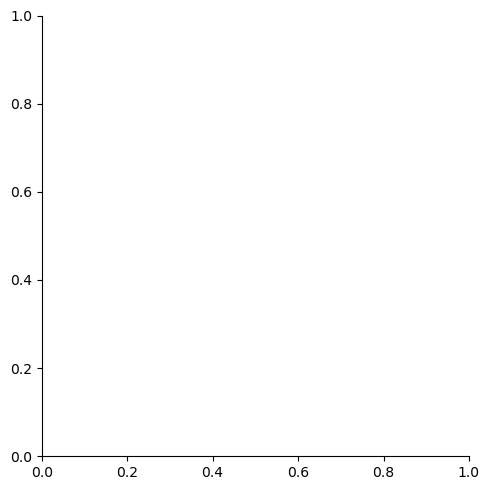

In [61]:
# Example: Line plot of SPOSTMIN_interp over time, faceted by attraction.
plt.figure(figsize=(16, 8))
sns.relplot(x='date', y='SPOSTMIN_interp', hue = 'attraction', kind = 'line', data=df_waiting_times_entities.dropna(subset=['SPOSTMIN_interp', 'date']))
plt.title('Interpolated Posted Wait Times Over Time, Faceted by Attraction')
plt.show()

# Example: Line plot of SPOSTMIN_interp over minute, colored by holiday.
plt.figure(figsize=(16, 8))
sns.lineplot(x='minute', y='SPOSTMIN_interp', hue='HOLIDAY', data=df_waiting_times_main_meta.dropna(subset=['SPOSTMIN_interp', 'minute', 'HOLIDAY']))
plt.title('Interpolated Posted Wait Times Over Minute, Colored by Holiday')
plt.xlabel('Minute')
plt.ylabel('Interpolated Posted Wait Time (minutes)')
plt.show()

In [74]:
import plotly.graph_objects as go

# Example: 3D scatter plot of SPOSTMIN_interp vs. temperature and capacity lost.
fig = go.Figure(data=[go.Scatter3d(
    x=df_waiting_times_capacity_meta['WDWMEANTEMP'],
    y=df_waiting_times_capacity_meta['CapacityLost_MK'],
    z=df_waiting_times_capacity_meta['SPOSTMIN_interp'],
    mode='markers',
    marker=dict(
        size=3,
        color=df_waiting_times_capacity_meta['DAYOFWEEK'],  # Color by day of week
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

KeyError: 'WDWMEANTEMP'

In [3]:
import pandas as pd
df_actuals_shifted = pd.read_csv("../data/clean/actuals_shifted.csv")
display(df_actuals_shifted)

,attraction,date,datetime,SACTMIN,SPOSTMIN,date,datetime,SACTMIN,minute
0,barnstormer,NaN,NaN,NaN,NaN,2015-01-01,2015-01-01 10:39:48,18.0,639
1,big_thunder_mtn,NaN,NaN,NaN,NaN,2015-01-01,2015-01-01 14:55:16,37.0,895
2,buzz_lightyear,NaN,NaN,NaN,NaN,2015-01-01,2015-01-01 10:24:25,69.0,624
3,buzz_lightyear,NaN,NaN,NaN,NaN,2015-01-01,2015-01-01 14:36:06,62.0,876
4,country_bears,NaN,NaN,NaN,NaN,2015-01-01,2015-01-01 10:12:43,0.0,612
...,...,...,...,...,...,...,...,...,...
184733,toy_story_mania,NaN,NaN,NaN,NaN,2021-12-28,2021-12-28 11:30:16,62.0,690
184734,toy_story_mania,NaN,NaN,NaN,NaN,2021-12-28,2021-12-28 20:42:57,19.0,1242
184735,under_the_sea,NaN,NaN,NaN,NaN,2021-12-28,2021-12-28 19:15:00,16.0,1155
184736,winnie_the_pooh,NaN,NaN,NaN,NaN,2021-12-28,2021-12-28 08:50:05,16.0,530


In [9]:
df_actuals_shifted.iloc[:, 1:5]
print(f"NaN count: {df_actuals_shifted.isna().sum()}") 

NaN count: attraction    0
date          0
datetime      0
SACTMIN       0
minute        0
dtype: int64


In [ ]:
df_actuals_shifted = df_actuals_shifted.drop(df_actuals_shifted.columns[1:5], axis=1)


In [10]:
df_actuals_shifted.to_csv("../data/clean/actuals_shifted.csv", index=False)


In [12]:
import pandas as pd
df_training_dataset = pd.read_csv("../data/clean/training_dataset.csv")
display(df_training_dataset)

,attraction,date,datetime,SACTMIN,SPOSTMIN,date,actual_over_posted
0,barnstormer,NaN,NaN,NaN,NaN,2015-01-01,0.900000
1,big_thunder_mtn,NaN,NaN,NaN,NaN,2015-01-01,0.528571
2,buzz_lightyear,NaN,NaN,NaN,NaN,2015-01-01,1.061538
3,buzz_lightyear,NaN,NaN,NaN,NaN,2015-01-01,1.078261
4,dumbo,NaN,NaN,NaN,NaN,2015-01-01,0.200000
...,...,...,...,...,...,...,...
176416,toy_story_mania,NaN,NaN,NaN,NaN,2021-12-28,0.729412
176417,toy_story_mania,NaN,NaN,NaN,NaN,2021-12-28,0.690909
176418,under_the_sea,NaN,NaN,NaN,NaN,2021-12-28,0.533333
176419,winnie_the_pooh,NaN,NaN,NaN,NaN,2021-12-28,0.640000
